In [1]:
import os
import pandas as pd
import numpy as np

os.chdir('2016')
data_2016 = pd.read_excel('Aggregate Data.xlsx')
data_2016 = data_2016.drop('Unnamed: 0', axis=1)

os.chdir('..')
os.chdir('2018')
data_2018 = pd.read_excel('Aggregate Data.xlsx')
data_2018 = data_2018.drop('Unnamed: 0', axis=1)

data_2016['Year'] = 2016
data_2018['Year'] = 2018

data_2018.replace(['Skip',np.nan], inplace=True)
data_2018['Office'].replace('Southern California','SoCal', inplace=True)
data_2018['Office'].replace('Northern California', 'NorCal', inplace=True)

data_2018 = pd.concat([data_2018[data_2018.columns[:-2]].apply(pd.to_numeric), data_2018[data_2018.columns[-2:]]], axis=1)

data_2016.replace(['Skip',np.nan], inplace=True)
data_2016 = pd.concat([data_2016[data_2016.columns[:-2]].apply(pd.to_numeric), data_2016[data_2016.columns[-2:]]], axis=1)

all_data = data_2016.append(data_2018)
all_data

,Treatment by local operation,Trust in local operation,Enjoyment in day-to-day tasks,Look forward to work,Confidence in future of local operation,Confidence in career trajectory in operation,Helping others with heavy workloads,Extra effort in job,Looking for jobs elsewhere,Sent out phone calls/resume elsewhere,...,Adequate resources to fulfill responsibilities,Job utilizes skills and abilities well,Understand career opportunities at organization,Understands contribution to organization,Fair compensation,Satisfied with frequency of individual performance/work recognition,Confidence in senior leadership decisions in local operation,Understand contribution to end customer satisfaction,Office,Year
0,2,2,2,2,2,2,2,2,0.0,0.0,...,2,2,2,2,2,2,2,2,Chicago,2016
1,2,2,2,2,2,2,2,2,0.0,0.0,...,2,2,2,2,2,2,2,2,Chicago,2016
2,2,2,2,2,2,2,2,2,1.0,1.0,...,2,2,2,2,2,1,2,2,Chicago,2016
3,2,2,2,2,2,2,2,2,1.0,1.0,...,1,2,2,2,2,1,2,2,Chicago,2016
4,2,2,2,2,2,2,2,2,1.0,1.0,...,1,2,2,2,2,1,2,2,Chicago,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,1,1,1,1,1,1,1,1.0,2.0,...,1,1,0,1,0,0,1,1,Wisconsin,2018
236,1,0,0,1,1,1,1,1,2.0,2.0,...,1,1,0,1,0,0,1,1,Wisconsin,2018
237,1,0,0,1,1,0,1,1,2.0,2.0,...,0,1,0,1,0,0,0,1,Wisconsin,2018
238,1,0,0,0,0,0,0,1,2.0,2.0,...,-1,0,-1,1,0,0,0,1,Wisconsin,2018


<ipython-input-2-f1aac8d8be71>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


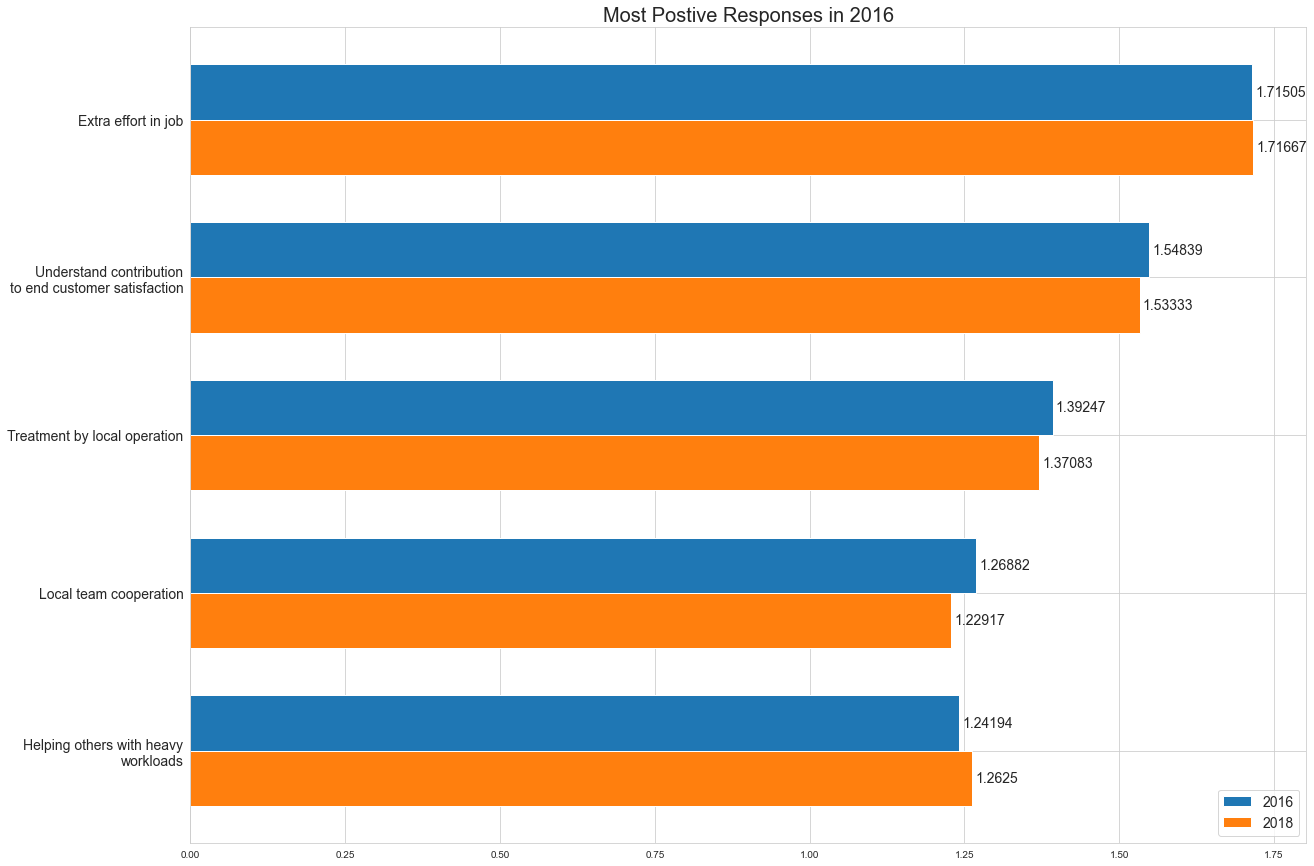

In [2]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
sns.set_style("whitegrid")

top_2016 = all_data[all_data['Year']==2016][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[top_2016.index], all_data['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2016', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-3-f2f4ad8406ba>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


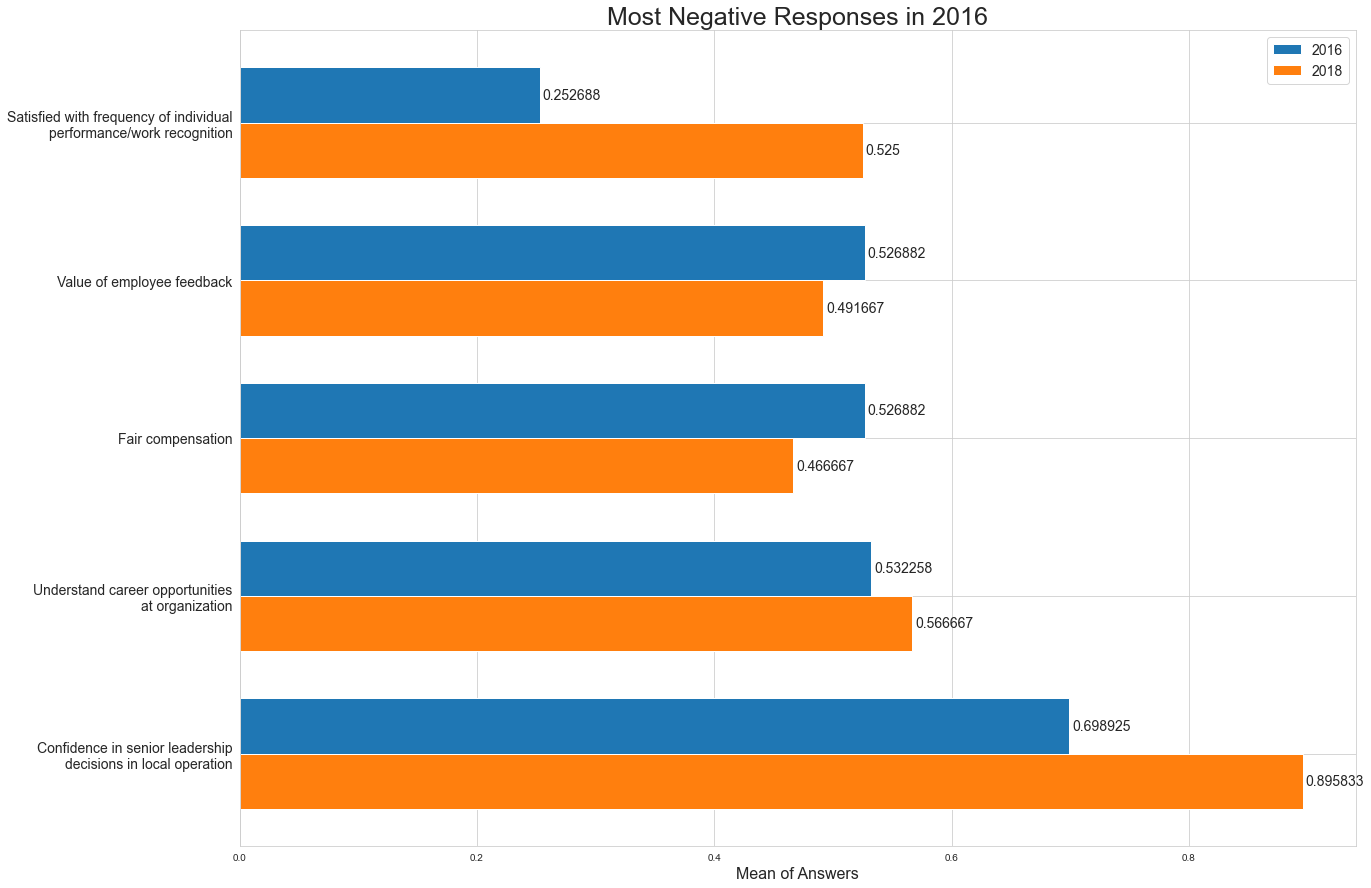

In [3]:
bottom_2016 = all_data[all_data['Year']==2016][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[bottom_2016.index], all_data['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
ax.set_xlabel('Mean of Answers', fontsize=16)
plt.title('Most Negative Responses in 2016', fontsize=25)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',30)] + '\n' + column[column.find(' ',30)+1:] if len(column)>40 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-4-7c3172d2a583>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


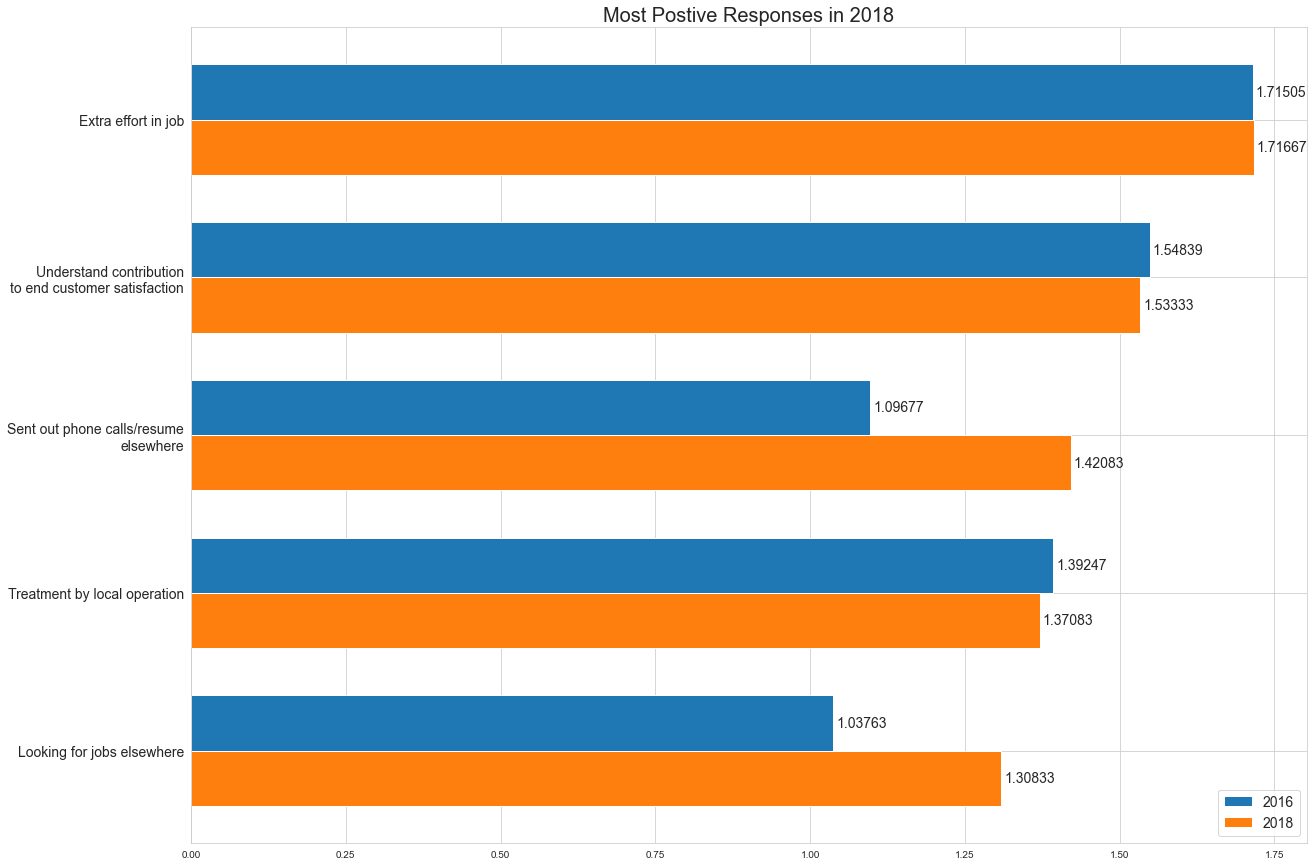

In [4]:
top_2018 = all_data[all_data['Year']==2018][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[top_2018.index], all_data['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2018', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-5-99e008326f82>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


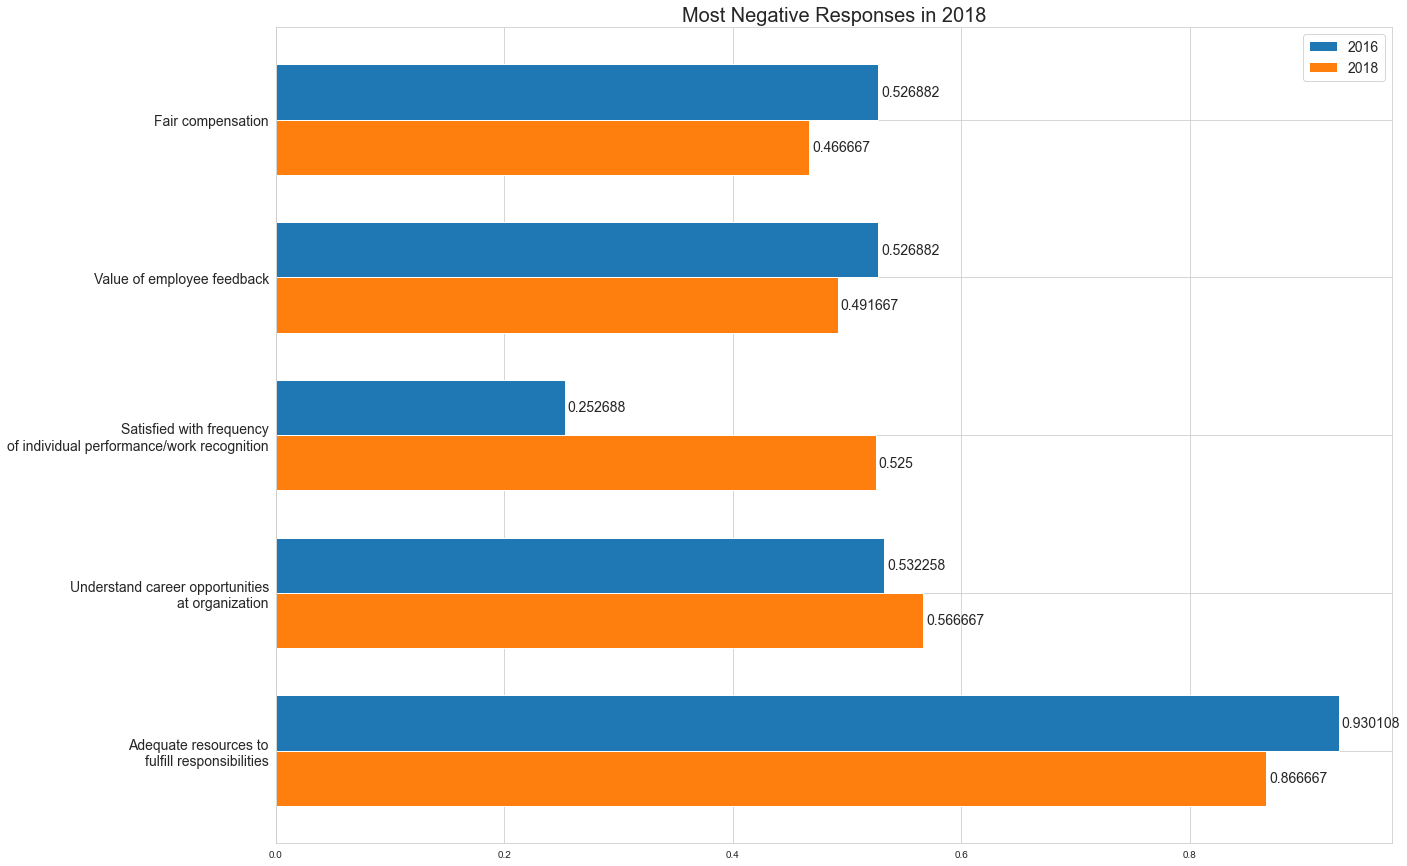

In [5]:
bottom_2018 = all_data[all_data['Year']==2018][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[bottom_2018.index], all_data['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2018', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-6-6657856e4ab6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


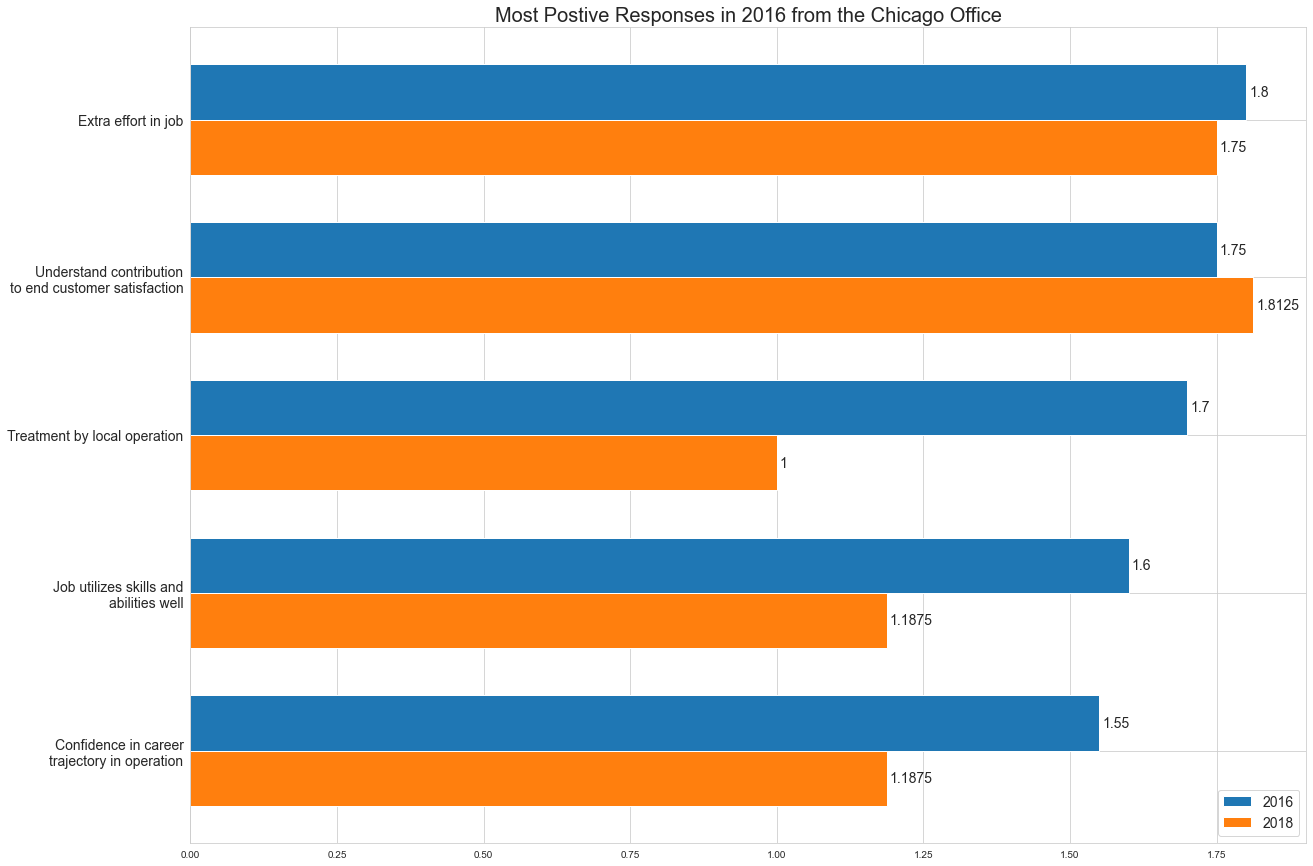

In [6]:
top_chi_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Chicago')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Chicago'][top_chi_2016.index], all_data[all_data['Office']=='Chicago']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2016 from the Chicago Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-7-9bdb4d15cf59>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


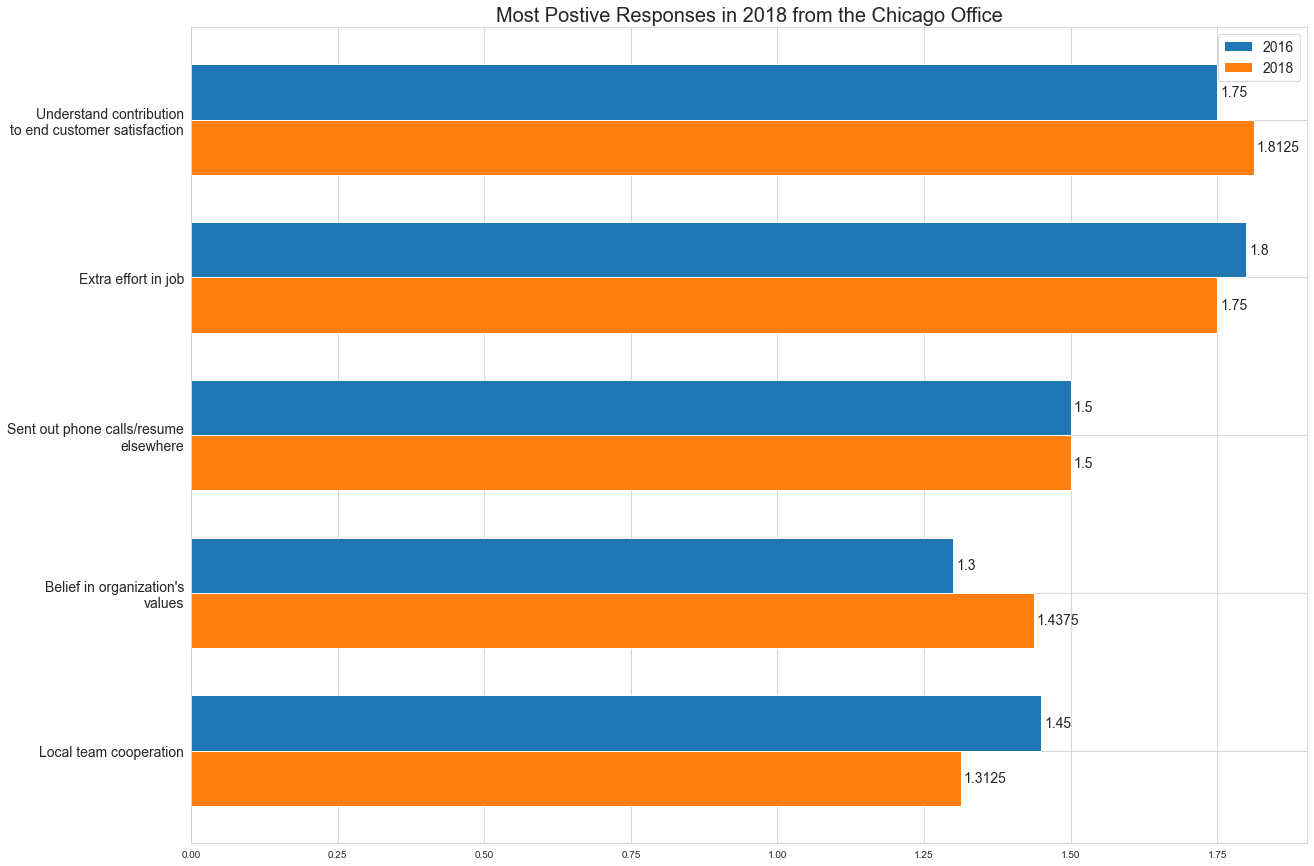

In [7]:
top_chi_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Chicago')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Chicago'][top_chi_2018.index], all_data[all_data['Office']=='Chicago']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2018 from the Chicago Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-8-c936bfacf97f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


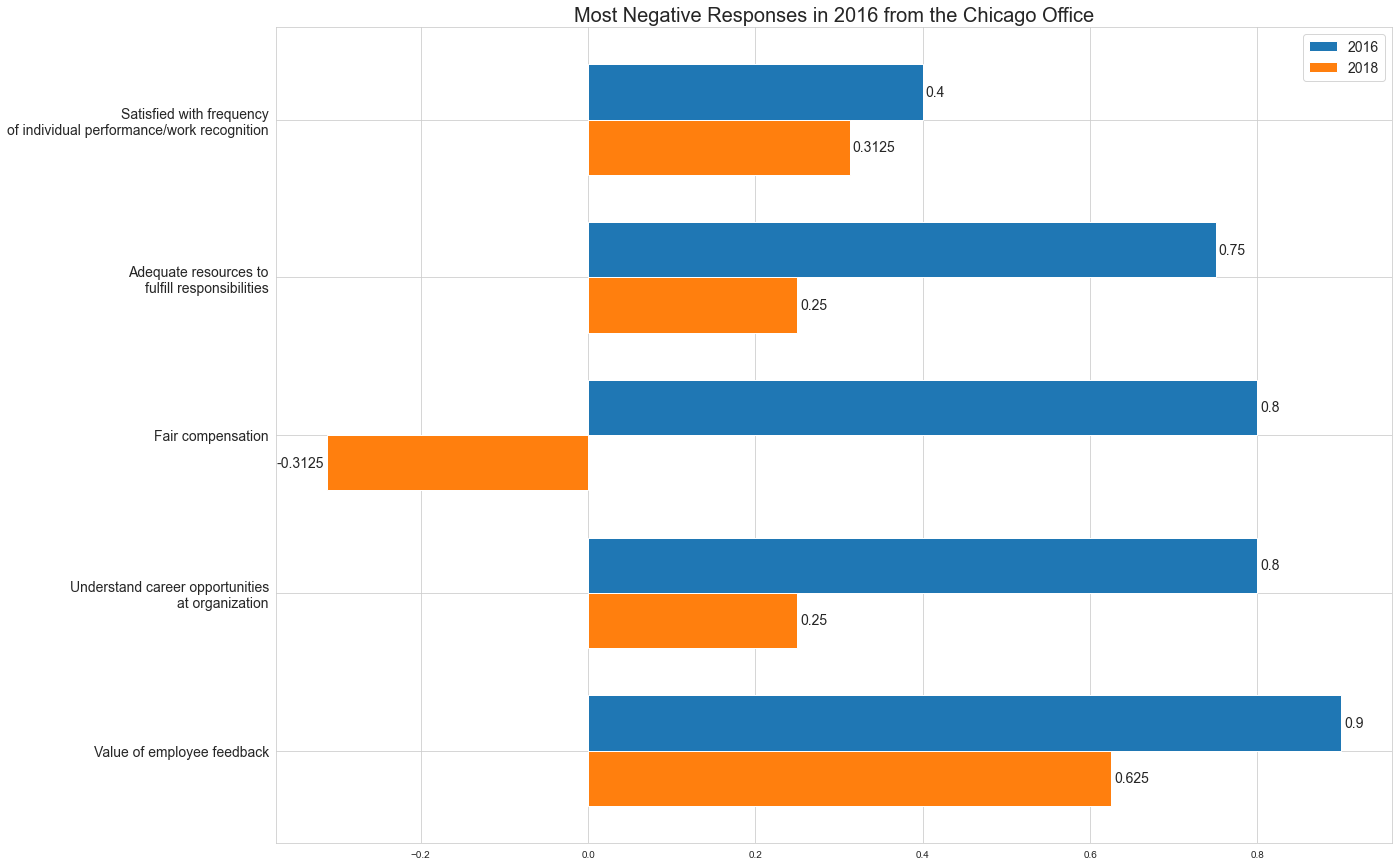

In [8]:
bottom_chi_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Chicago')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Chicago'][bottom_chi_2016.index], all_data[all_data['Office']=='Chicago']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2016 from the Chicago Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-9-111f4f200e29>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


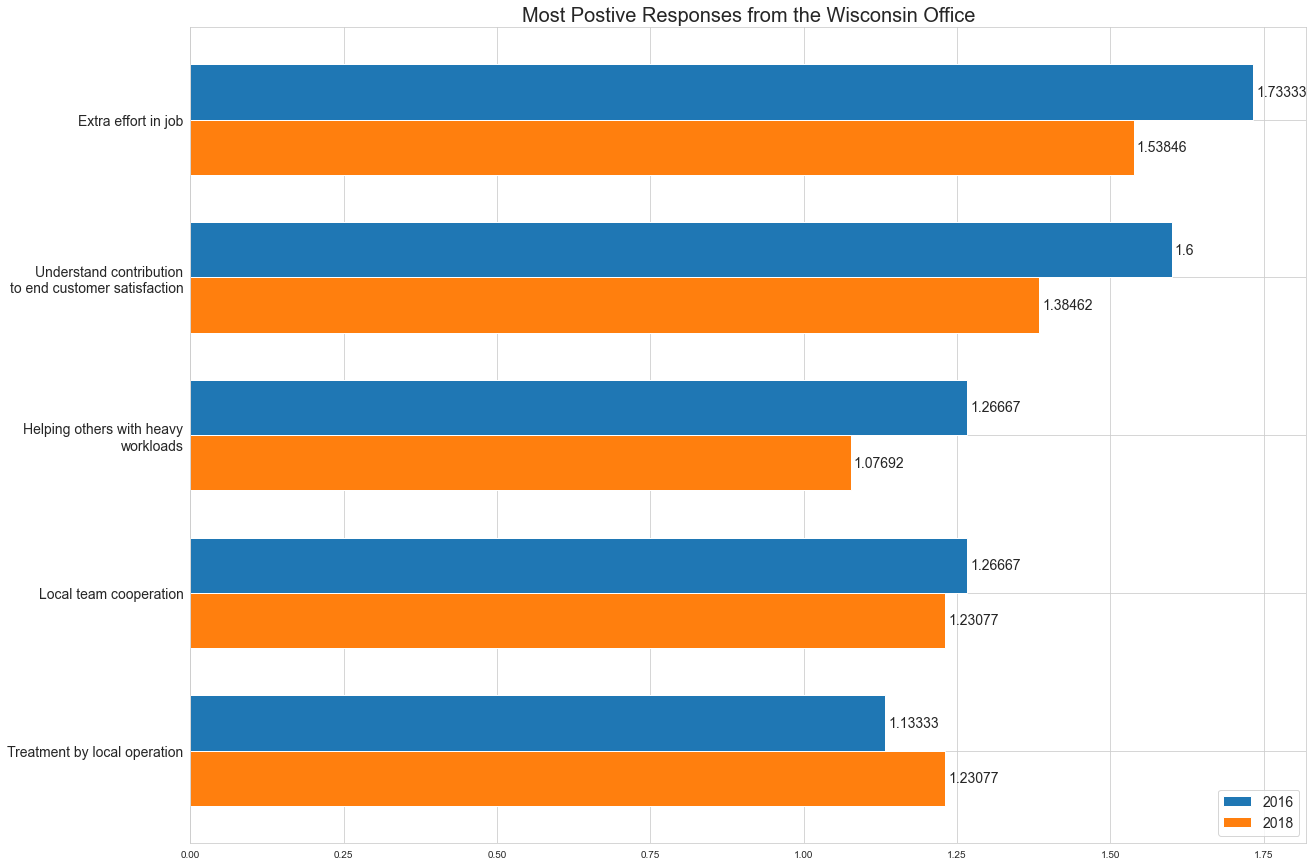

In [9]:
top_wi_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Wisconsin')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Wisconsin'][top_wi_2016.index], all_data[all_data['Office']=='Wisconsin']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses from the Wisconsin Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-10-9c78980c1251>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


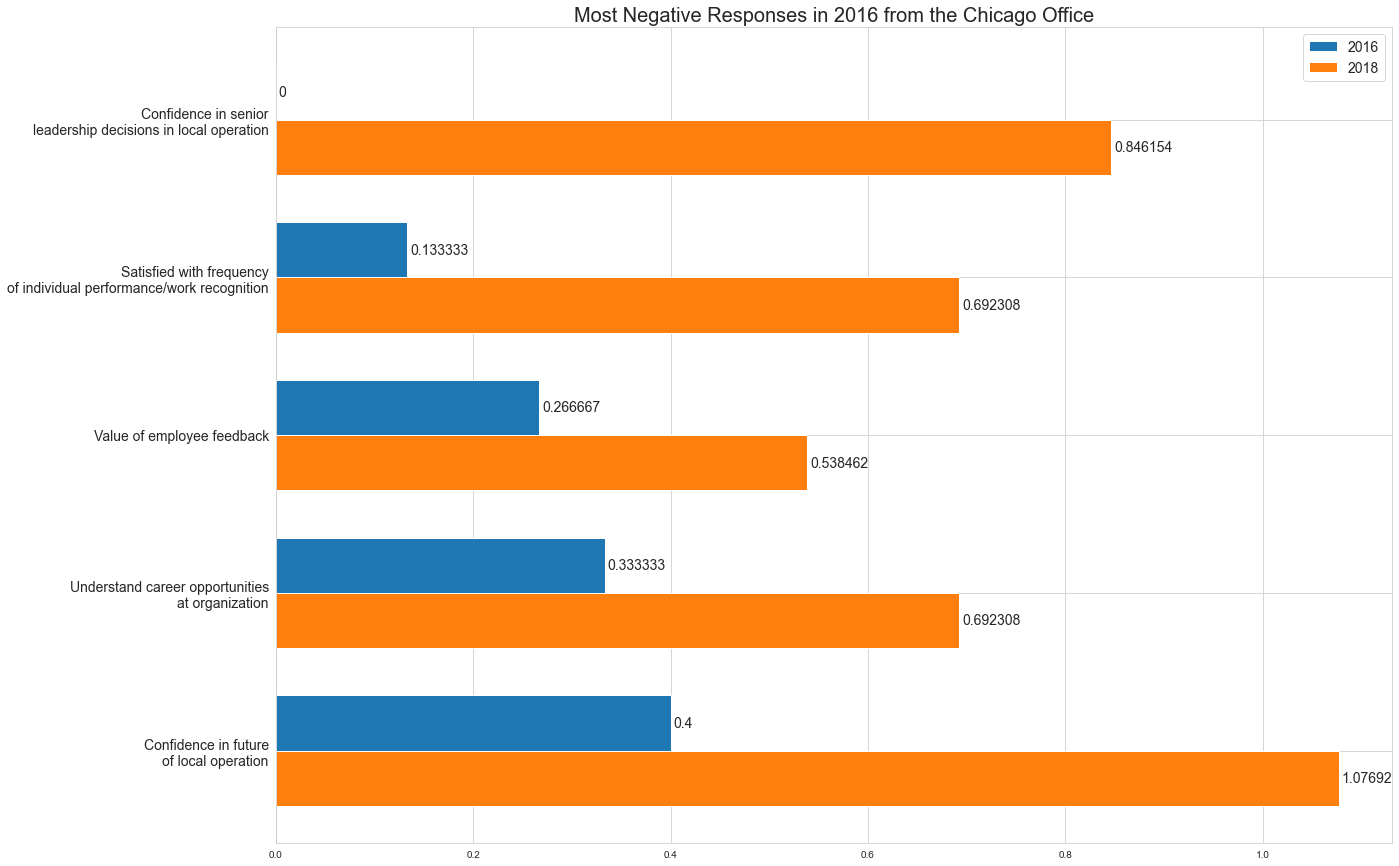

In [10]:
bottom_wi_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Wisconsin')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Wisconsin'][bottom_wi_2016.index], all_data[all_data['Office']=='Wisconsin']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2016 from the Chicago Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-11-40f5bb277d2c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


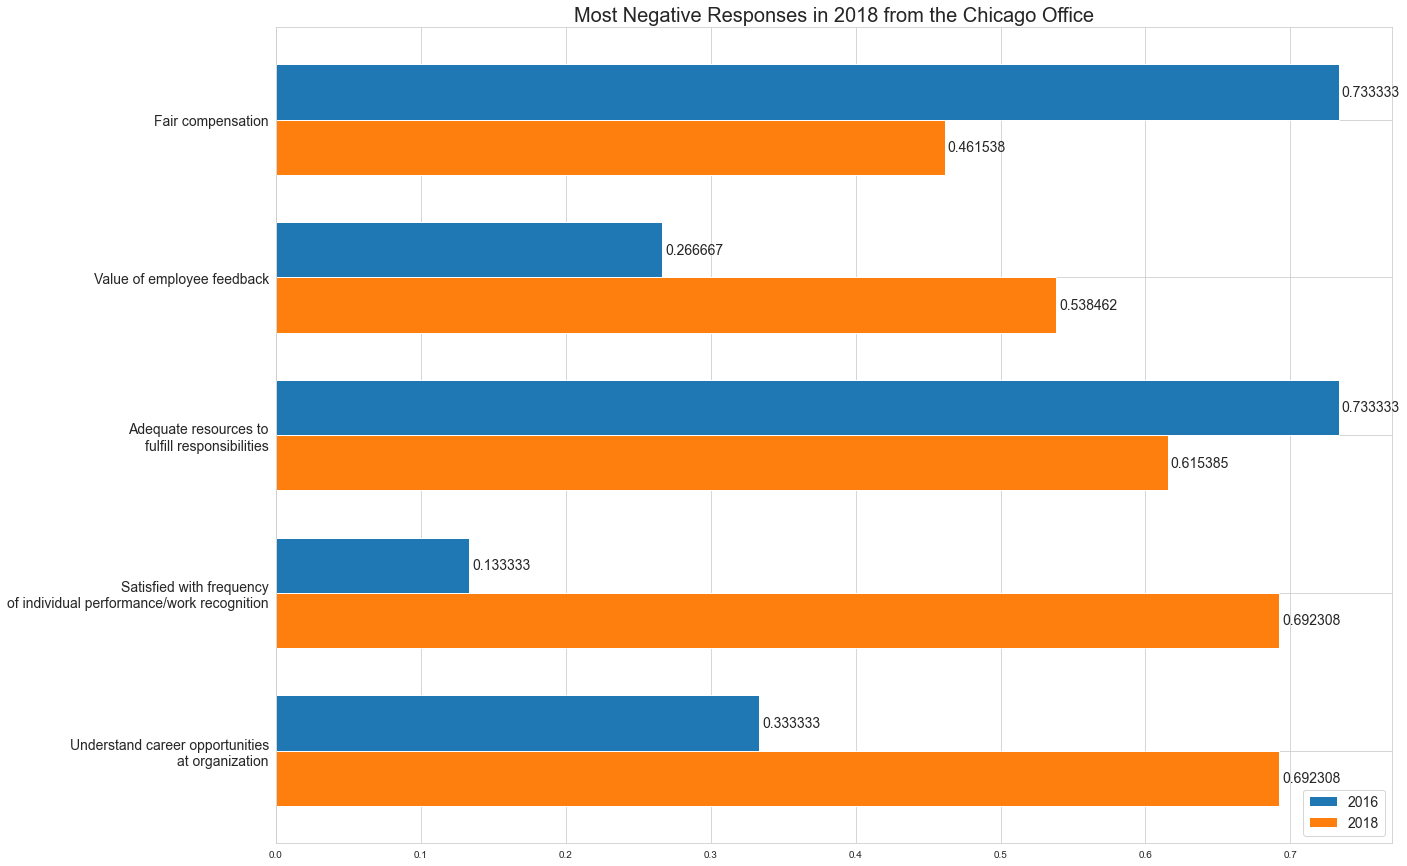

In [11]:
bottom_wi_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Wisconsin')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Wisconsin'][bottom_wi_2018.index], all_data[all_data['Office']=='Wisconsin']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2018 from the Chicago Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-12-95dce838584a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


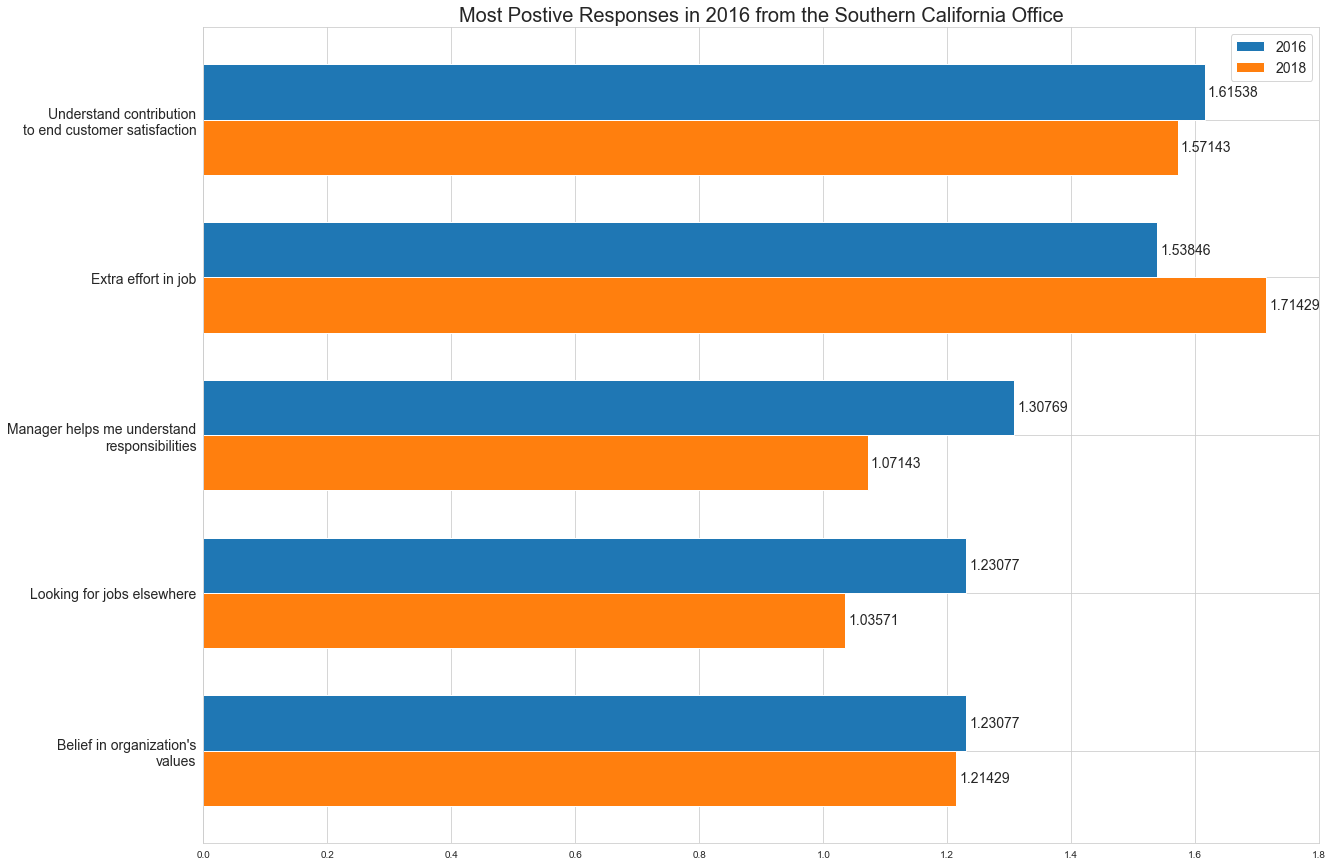

In [12]:
top_socal_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='SoCal')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='SoCal'][top_socal_2016.index], all_data[all_data['Office']=='SoCal']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2016 from the Southern California Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-13-1f888bcb2cc4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


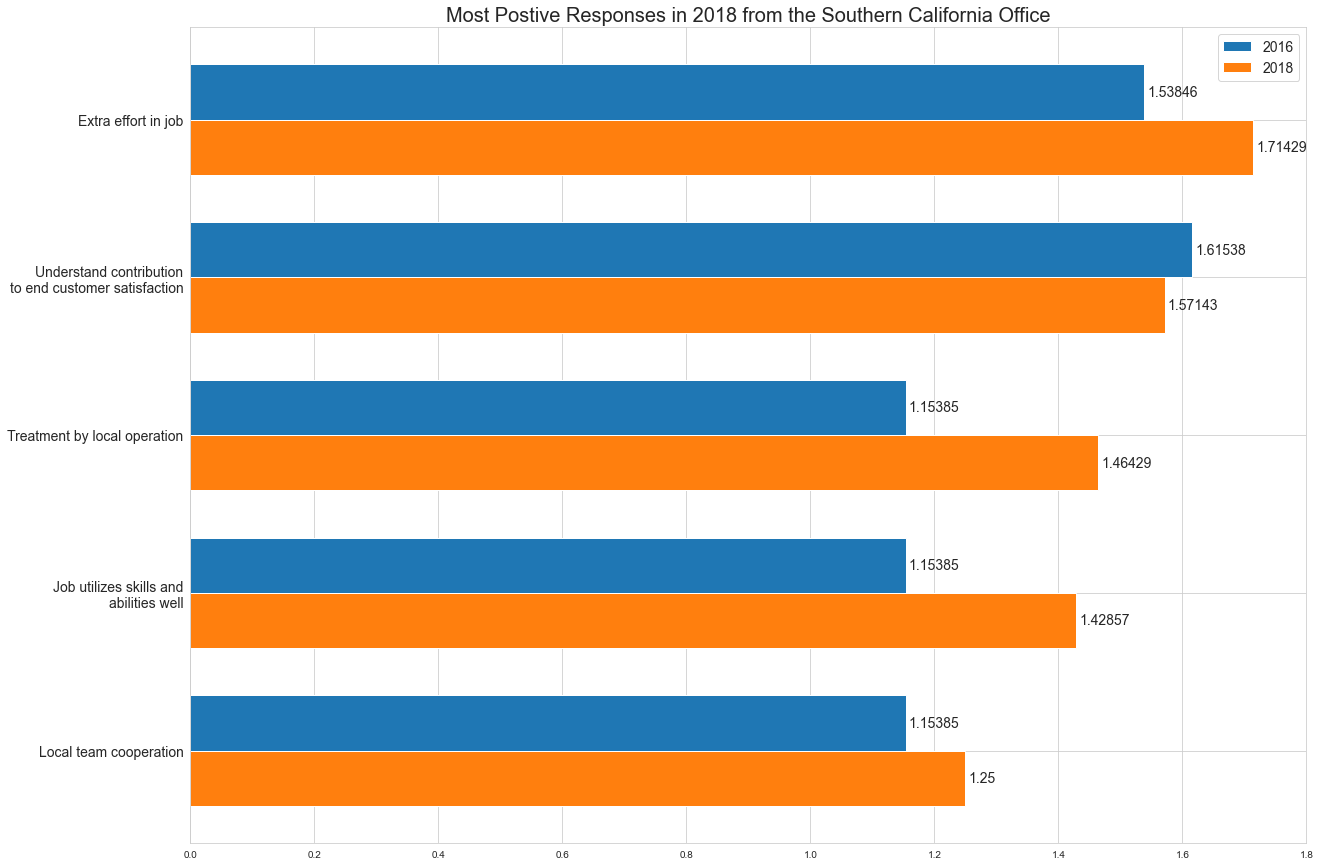

In [13]:
top_socal_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='SoCal')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='SoCal'][top_socal_2018.index], all_data[all_data['Office']=='SoCal']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2018 from the Southern California Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-14-510cd5e33dc0>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


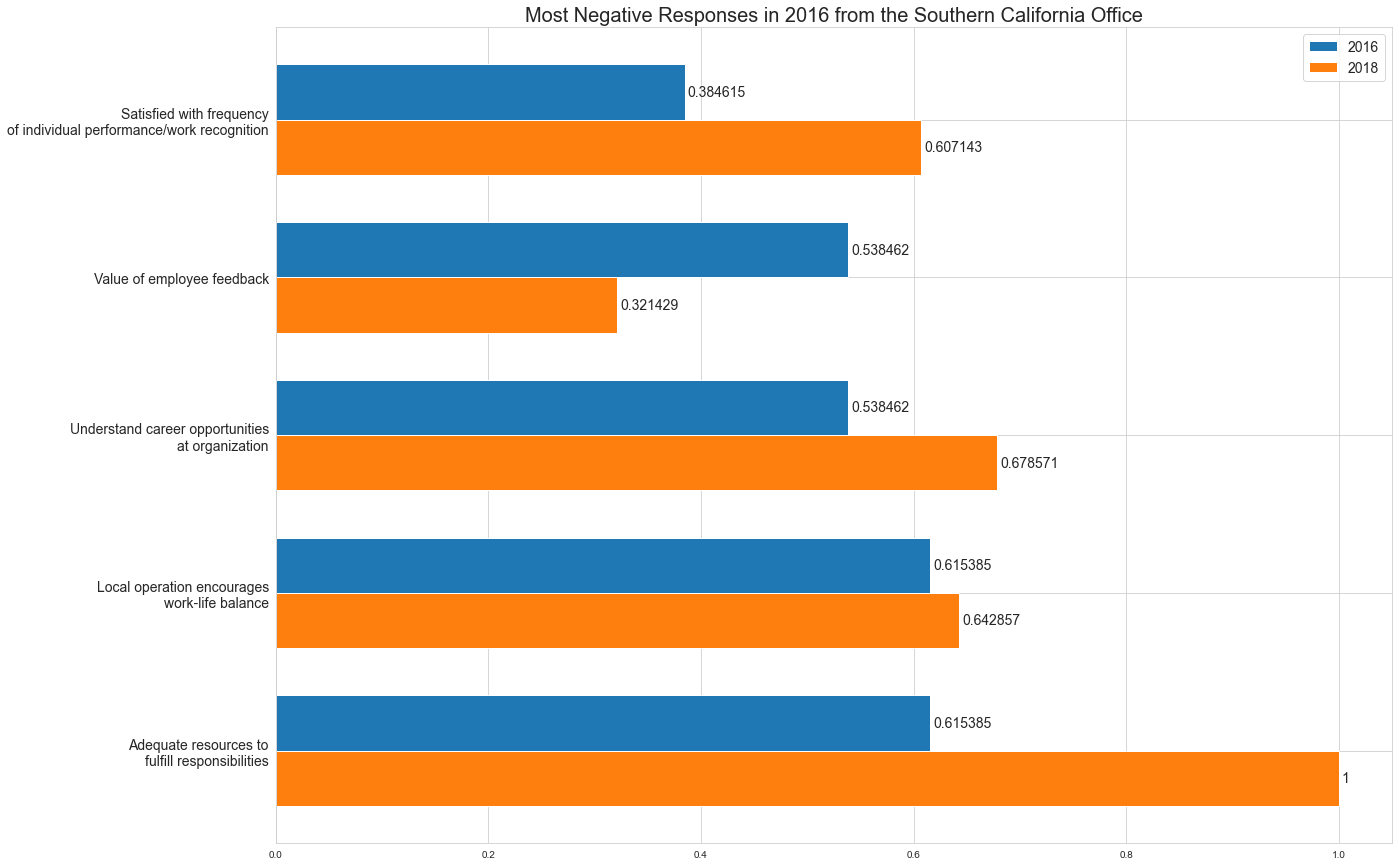

In [14]:
bottom_socal_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='SoCal')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='SoCal'][bottom_socal_2016.index], all_data[all_data['Office']=='SoCal']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2016 from the Southern California Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-15-bf2c2e272c23>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


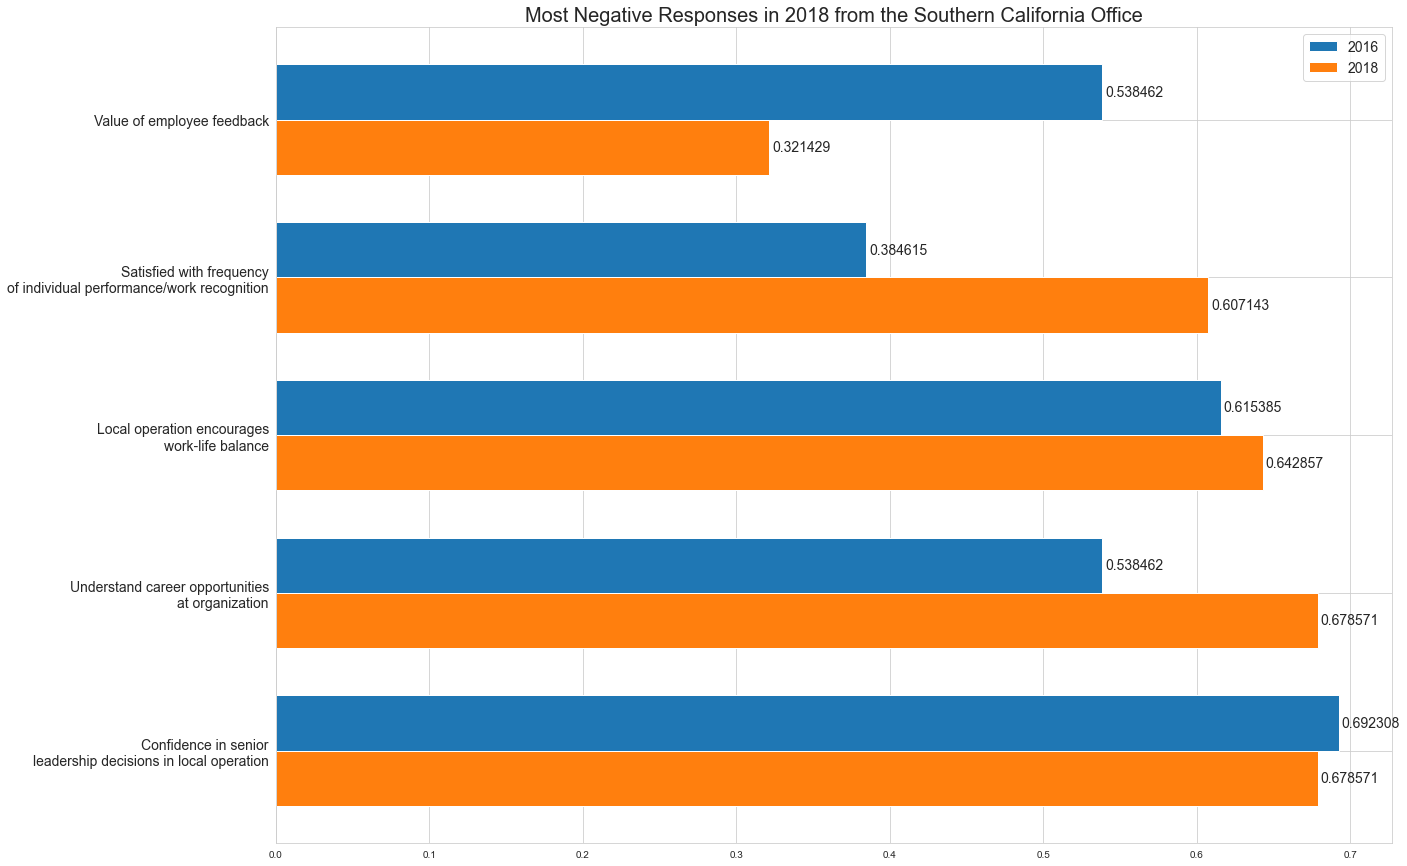

In [15]:
bottom_socal_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='SoCal')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='SoCal'][bottom_socal_2018.index], all_data[all_data['Office']=='SoCal']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2018 from the Southern California Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-16-72ced803077a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


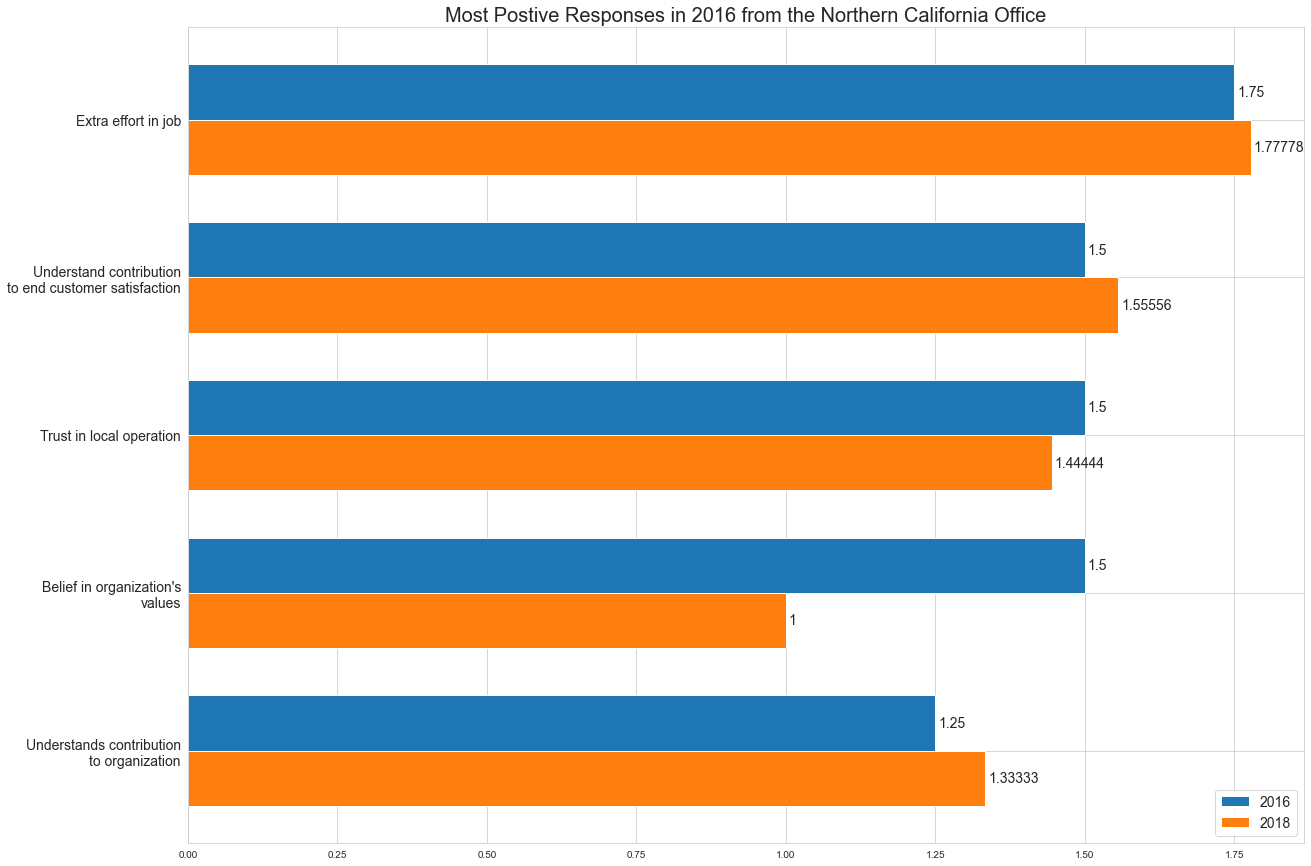

In [16]:
top_norcal_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='NorCal')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='NorCal'][top_norcal_2016.index], all_data[all_data['Office']=='NorCal']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2016 from the Northern California Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-17-2146f3ce2ebb>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


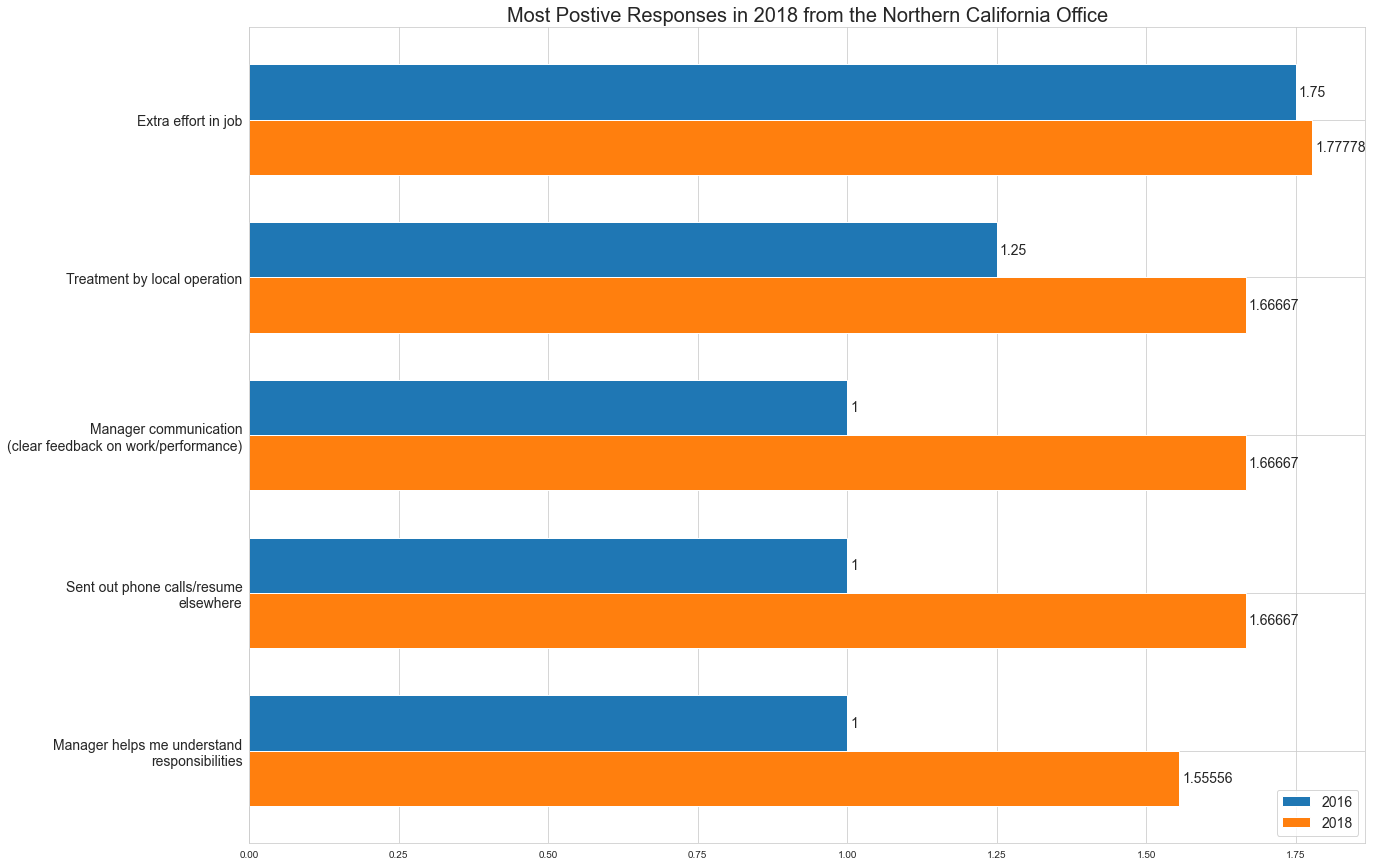

In [17]:
top_norcal_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='NorCal')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='NorCal'][top_norcal_2018.index], all_data[all_data['Office']=='NorCal']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2018 from the Northern California Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-18-47ec450397ed>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


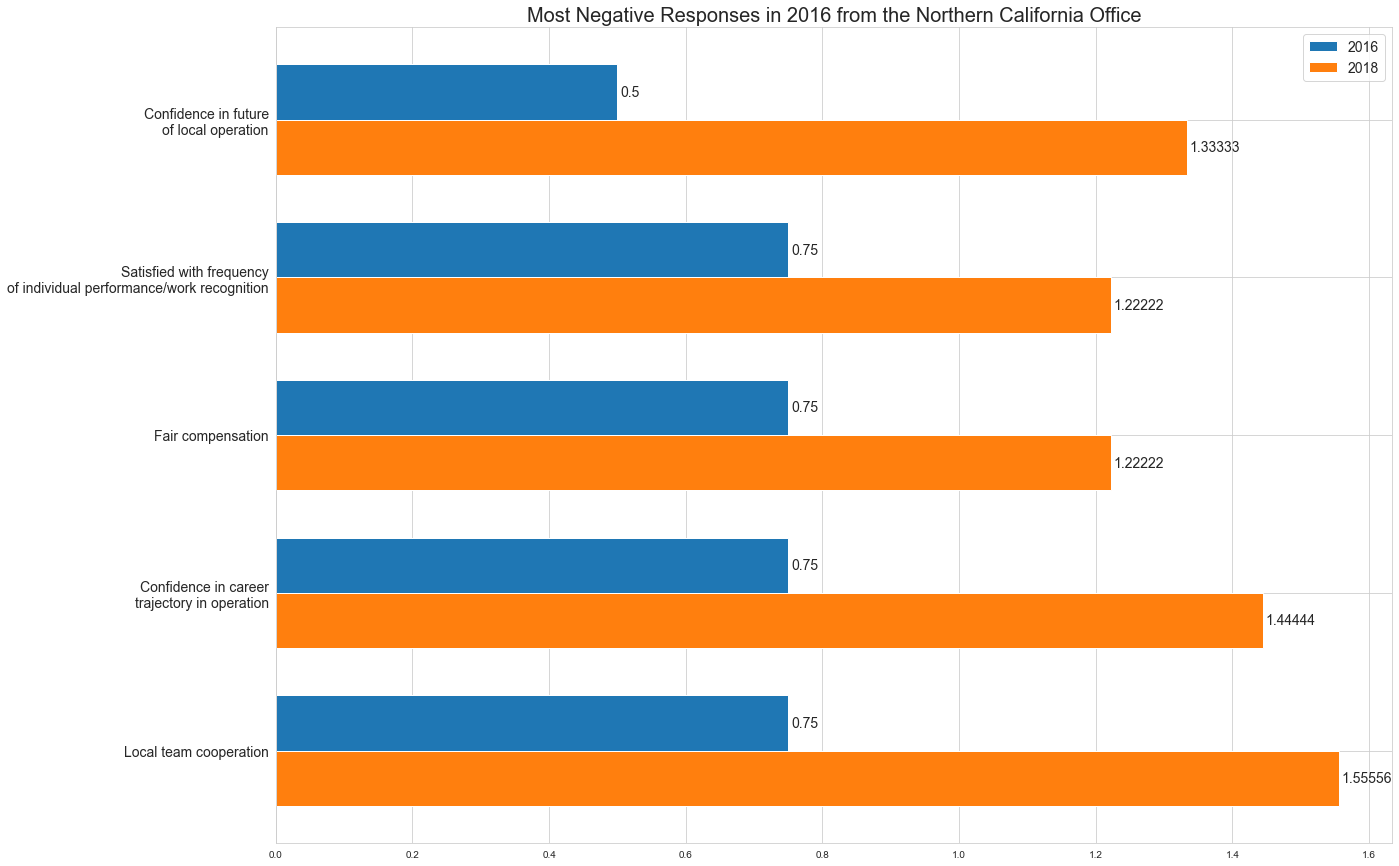

In [18]:
bottom_norcal_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='NorCal')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='NorCal'][bottom_norcal_2016.index], all_data[all_data['Office']=='NorCal']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2016 from the Northern California Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-19-24d3bbd7d542>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


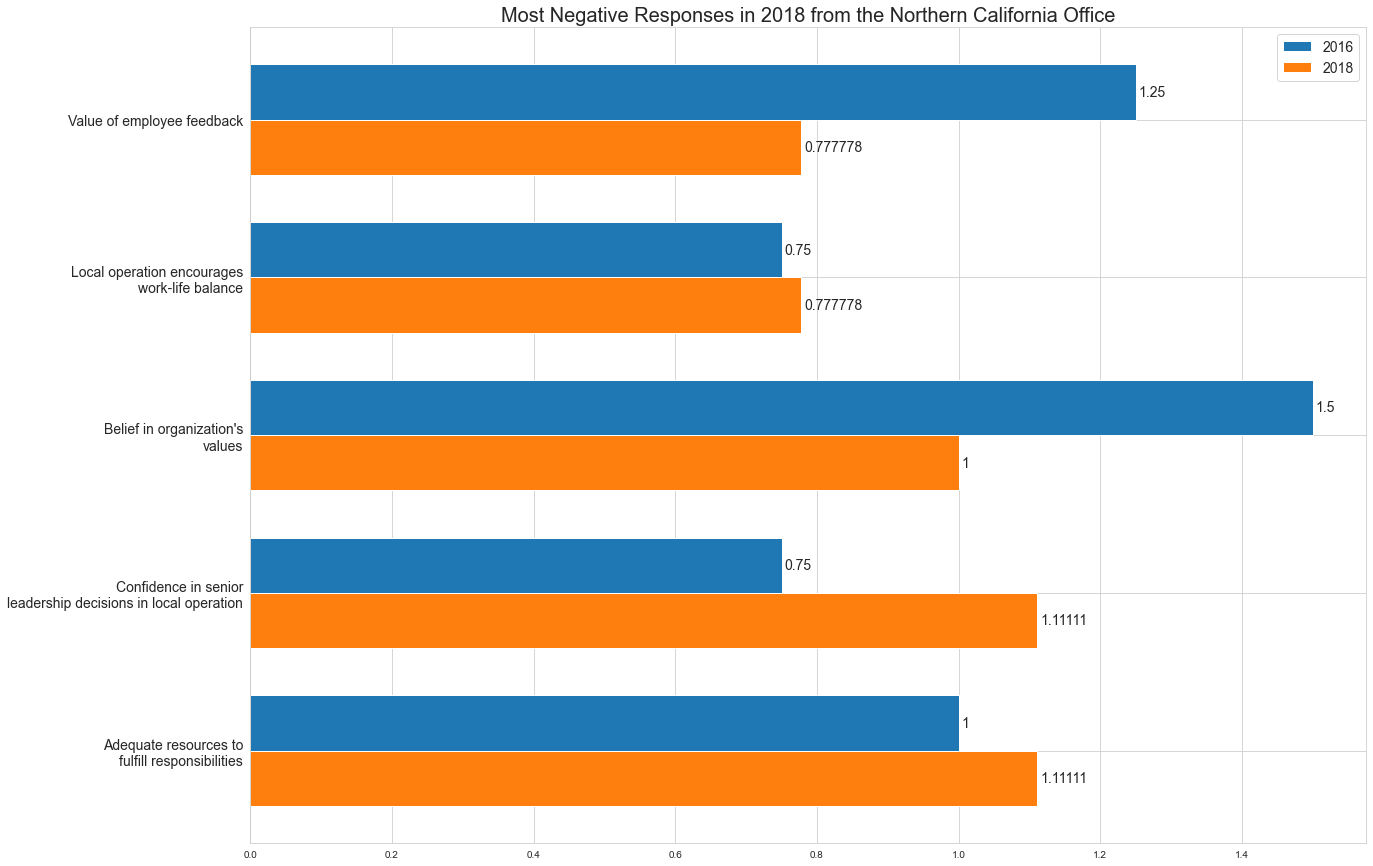

In [19]:
bottom_norcal_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='NorCal')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='NorCal'][bottom_norcal_2018.index], all_data[all_data['Office']=='NorCal']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2018 from the Northern California Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-20-76cd4fc45566>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


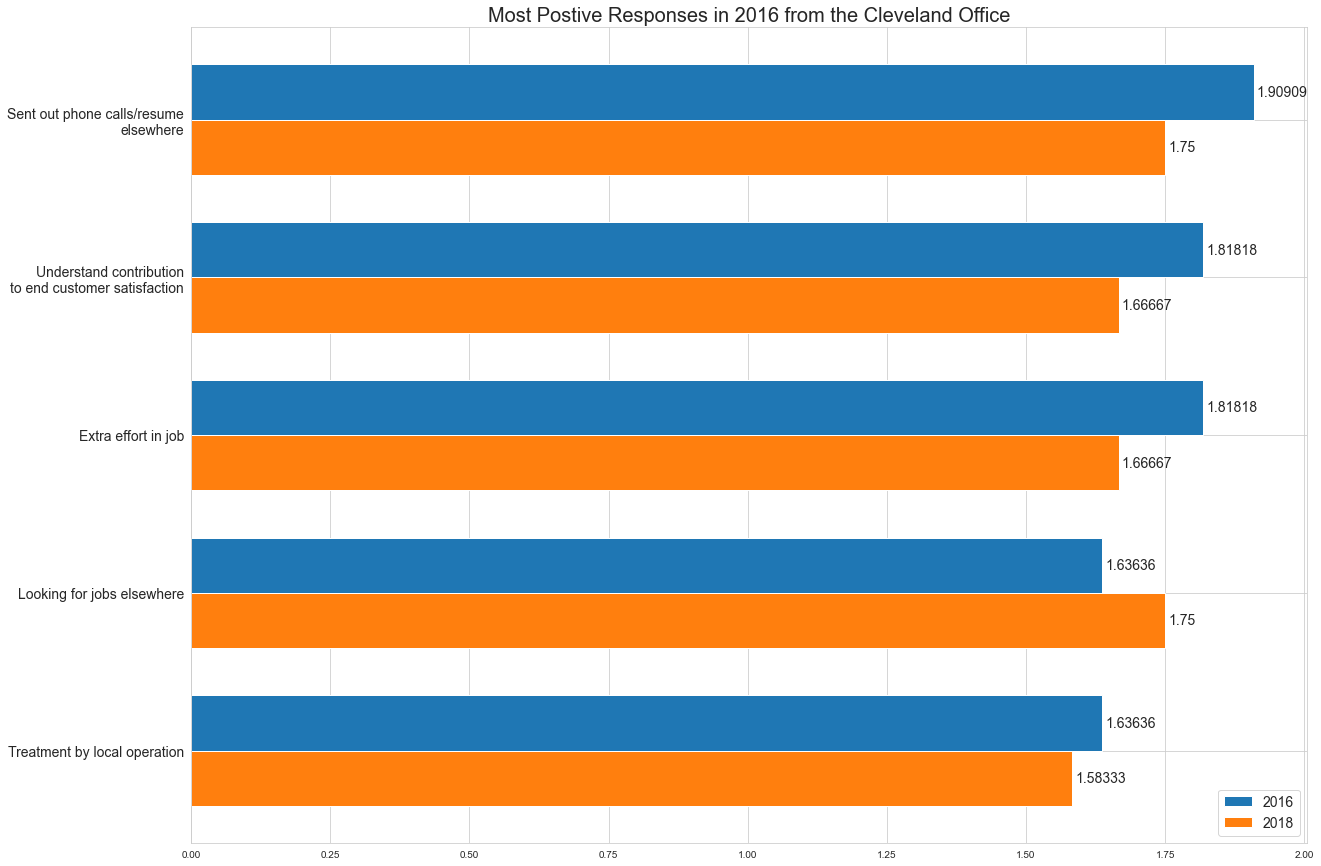

In [20]:
top_cleve_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Cleveland')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Cleveland'][top_cleve_2016.index], all_data[all_data['Office']=='Cleveland']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2016 from the Cleveland Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-21-59d51a0feadf>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


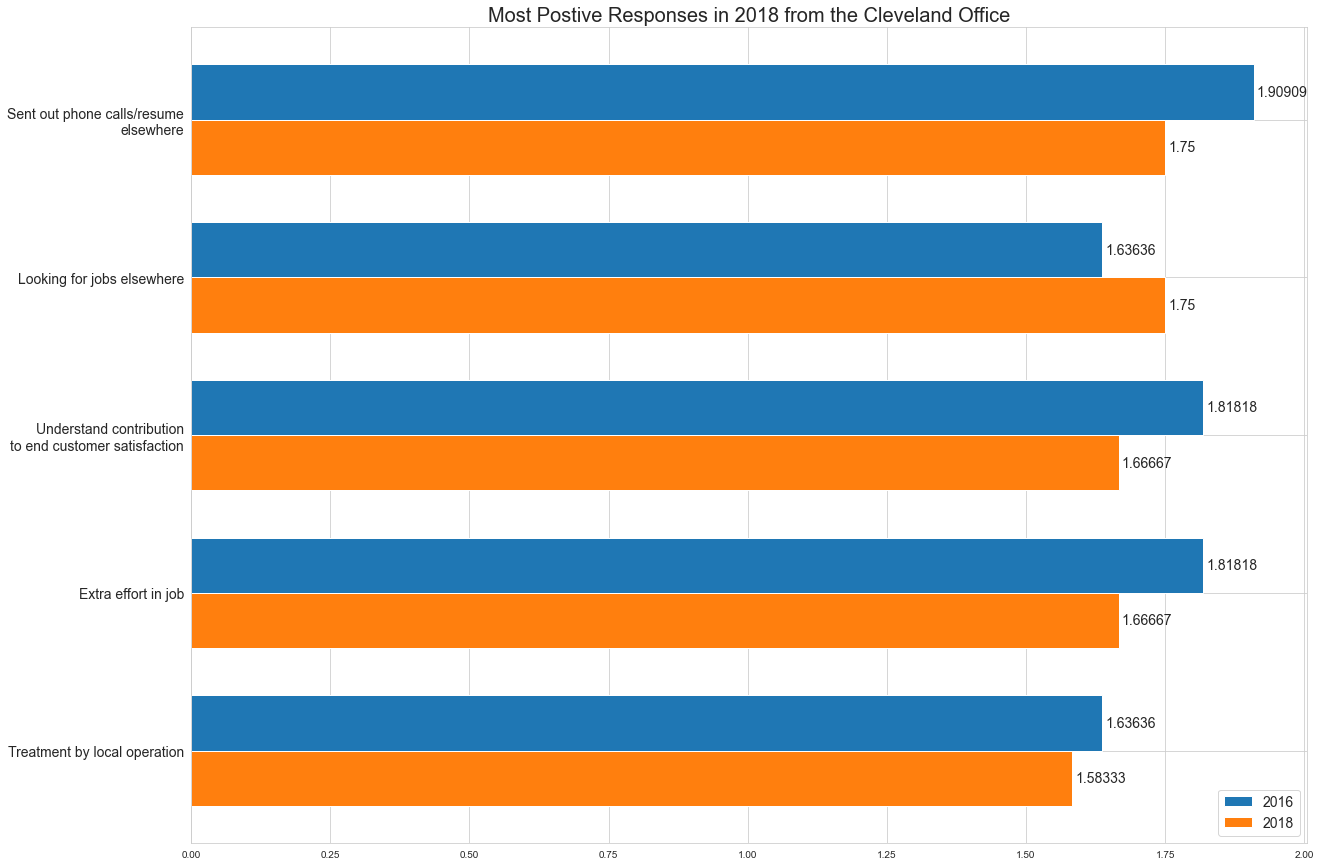

In [21]:
top_cleve_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Cleveland')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Cleveland'][top_cleve_2018.index], all_data[all_data['Office']=='Cleveland']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2018 from the Cleveland Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-22-2f3415f65a47>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


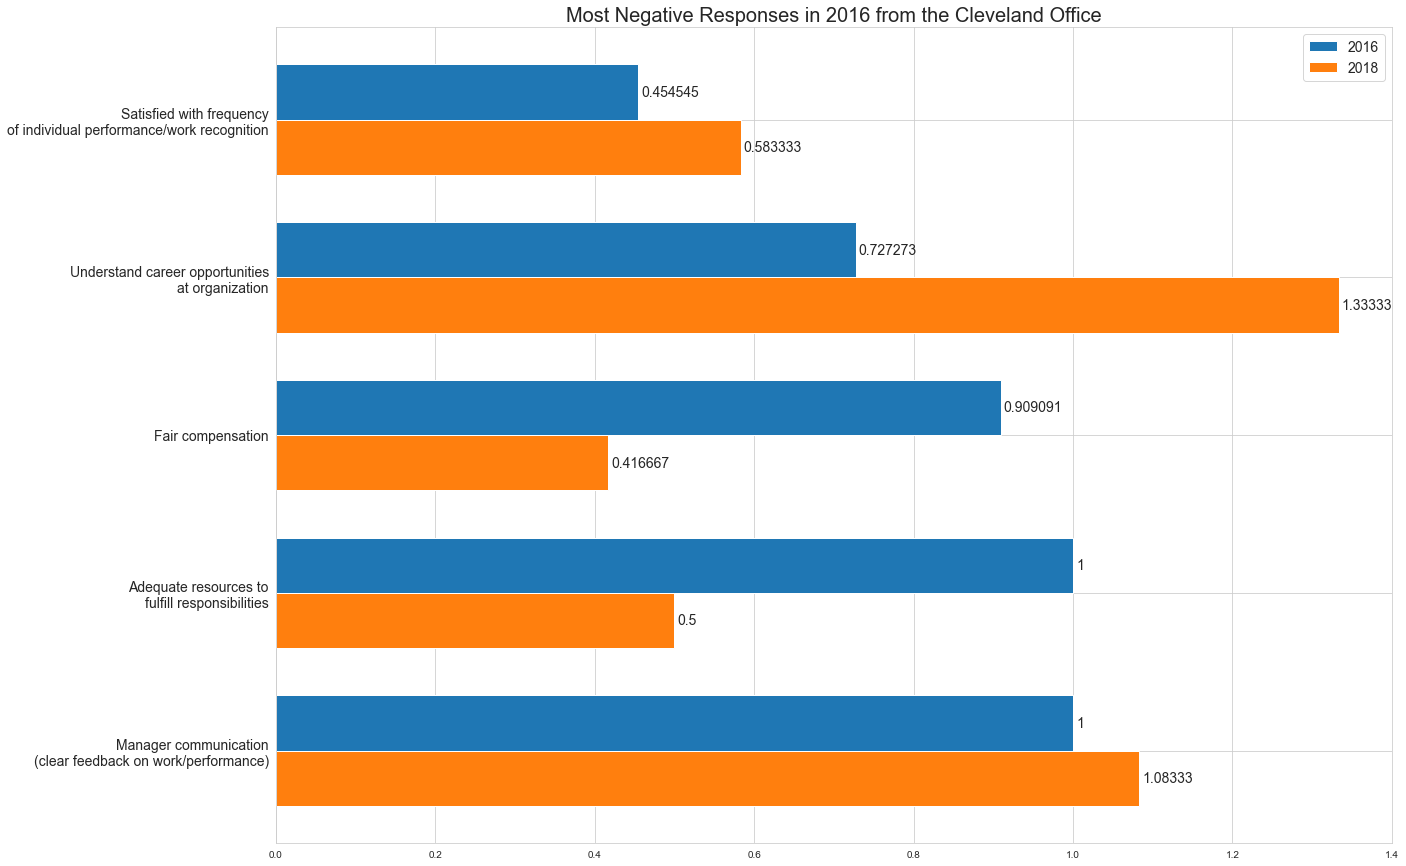

In [22]:
bottom_cleve_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Cleveland')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Cleveland'][bottom_cleve_2016.index], all_data[all_data['Office']=='Cleveland']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2016 from the Cleveland Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-23-385cca508b4e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


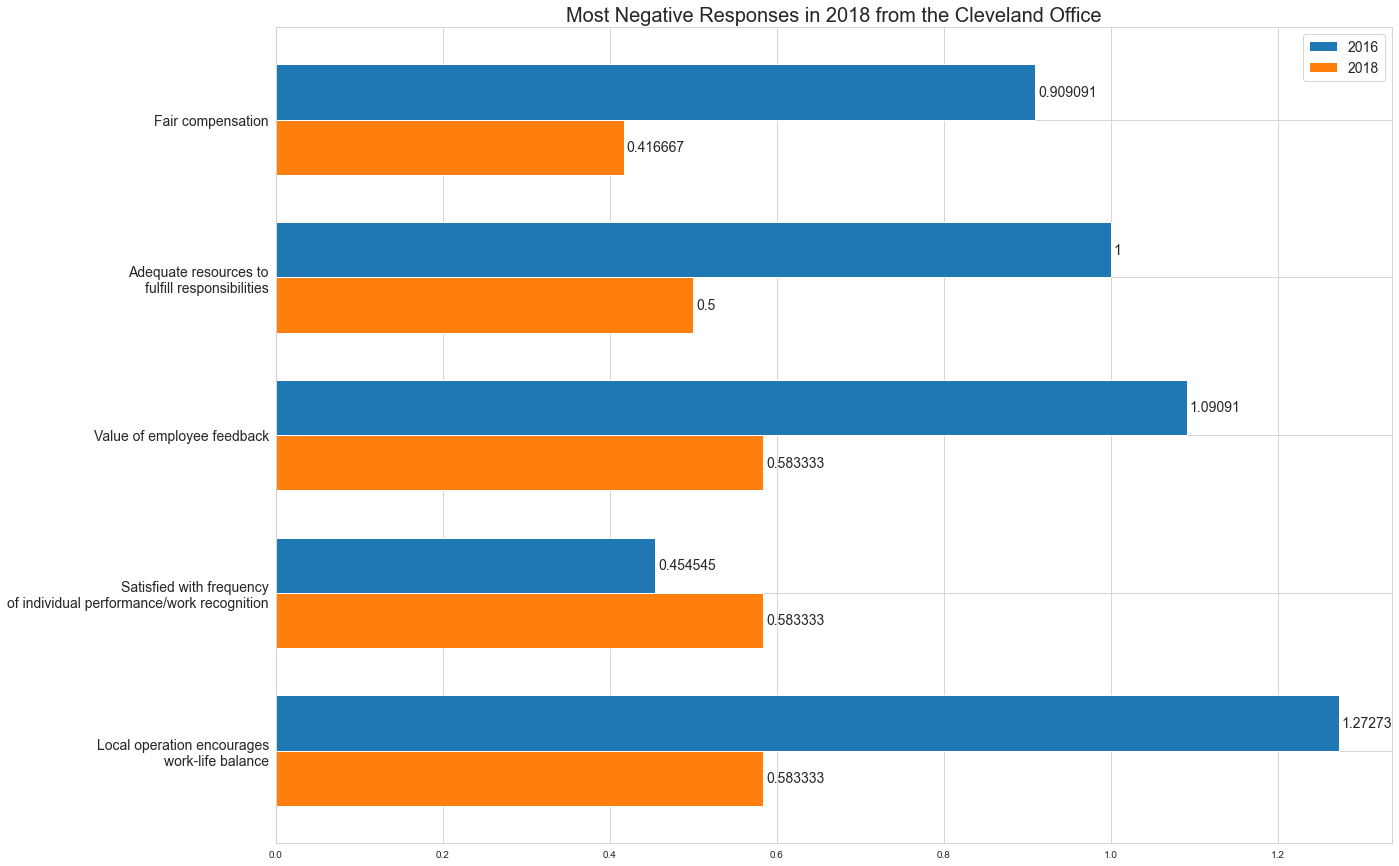

In [23]:
bottom_cleve_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Cleveland')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Cleveland'][bottom_cleve_2018.index], all_data[all_data['Office']=='Cleveland']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2018 from the Cleveland Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-24-c5e8ec6a36f1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


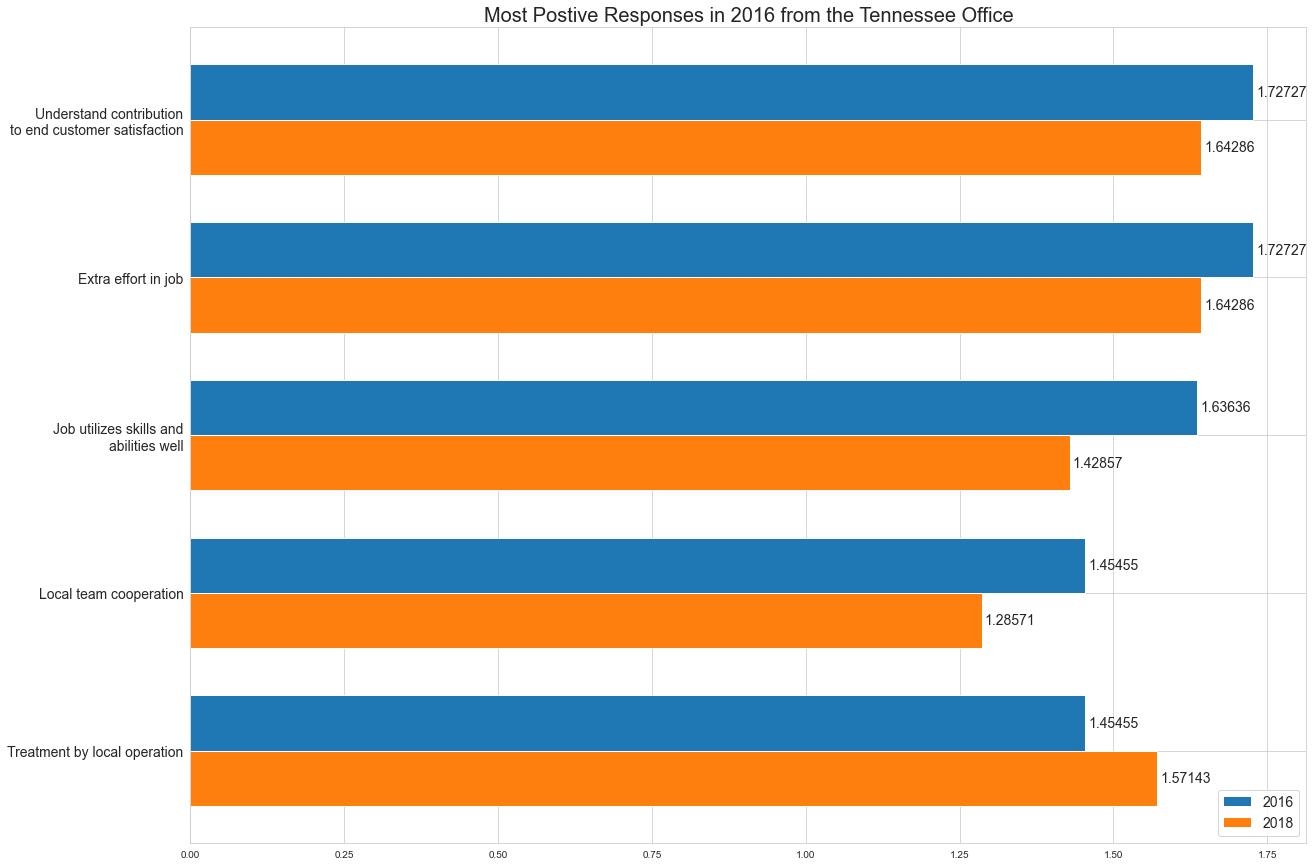

In [24]:
top_tenn_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Tennessee')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Tennessee'][top_tenn_2016.index], all_data[all_data['Office']=='Tennessee']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2016 from the Tennessee Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-25-b9b4ee02ea8f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


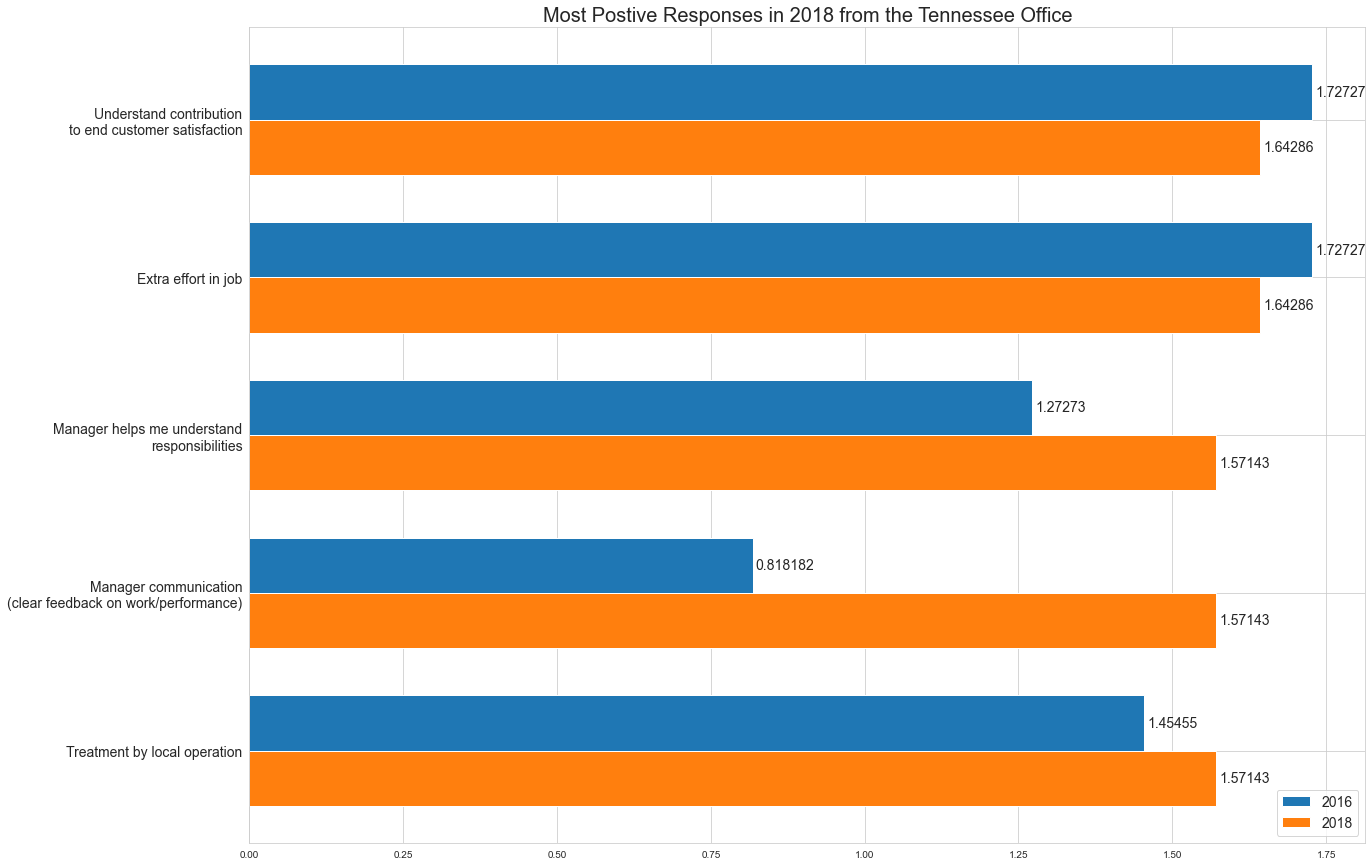

In [25]:
top_tenn_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Tennessee')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Tennessee'][top_tenn_2018.index], all_data[all_data['Office']=='Tennessee']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2018 from the Tennessee Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-26-3833973360fe>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


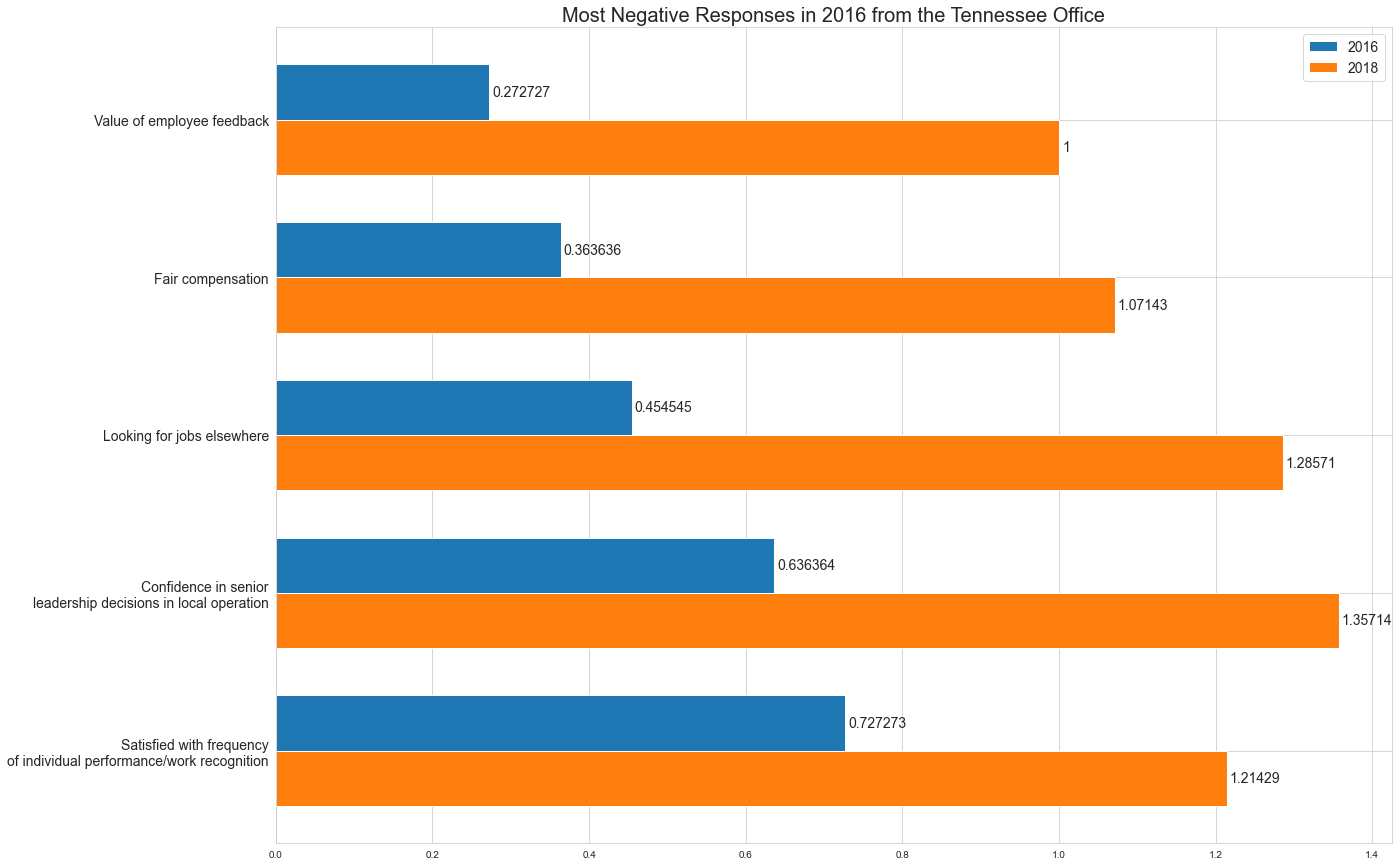

In [26]:
bottom_tenn_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Tennessee')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Tennessee'][bottom_tenn_2016.index], all_data[all_data['Office']=='Tennessee']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2016 from the Tennessee Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-27-c70760aa57b7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


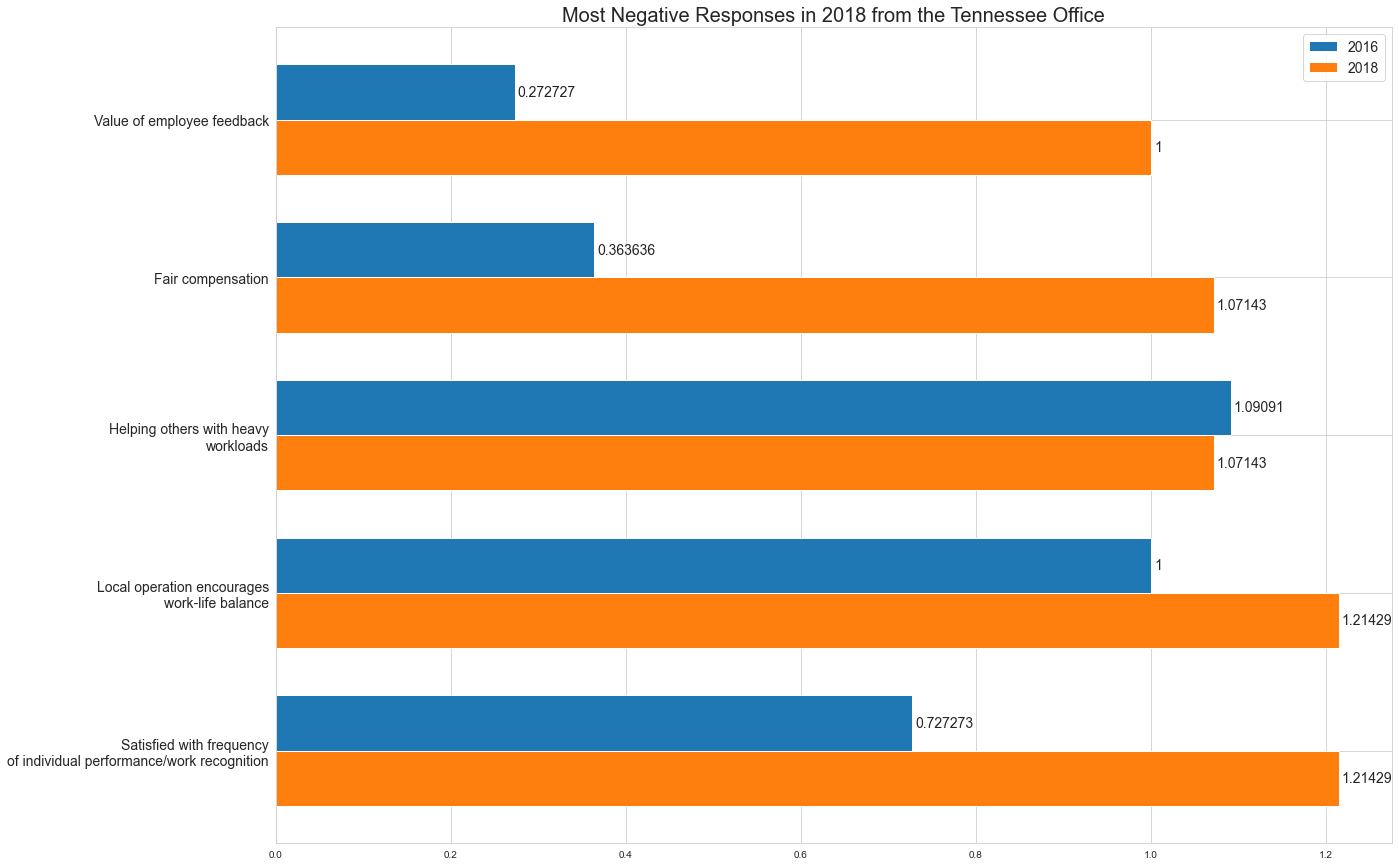

In [27]:
bottom_tenn_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Tennessee')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Tennessee'][bottom_tenn_2018.index], all_data[all_data['Office']=='Tennessee']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2018 from the Tennessee Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-28-2c79927625f5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


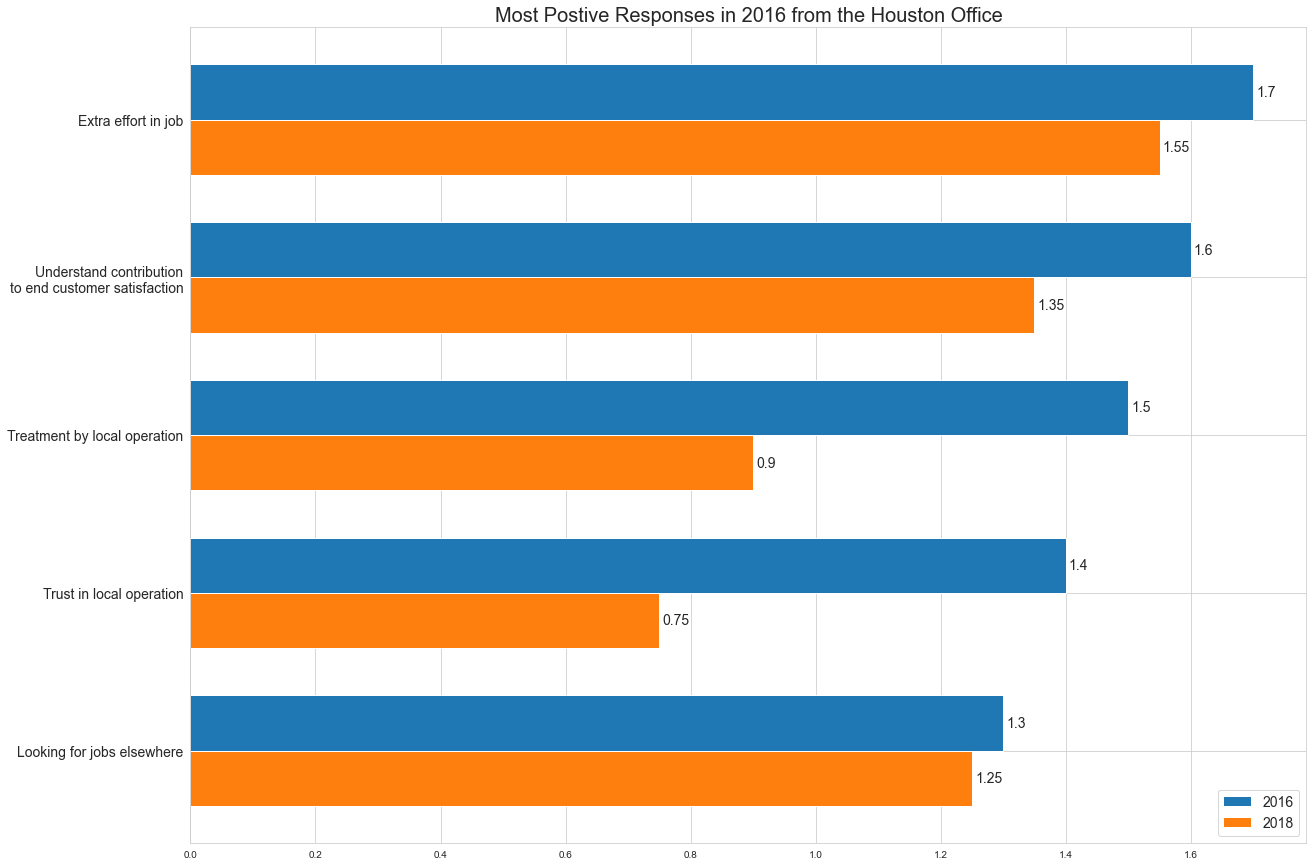

In [28]:
top_hous_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Houston')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Houston'][top_hous_2016.index], all_data[all_data['Office']=='Houston']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2016 from the Houston Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-38-45ee80f78d70>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


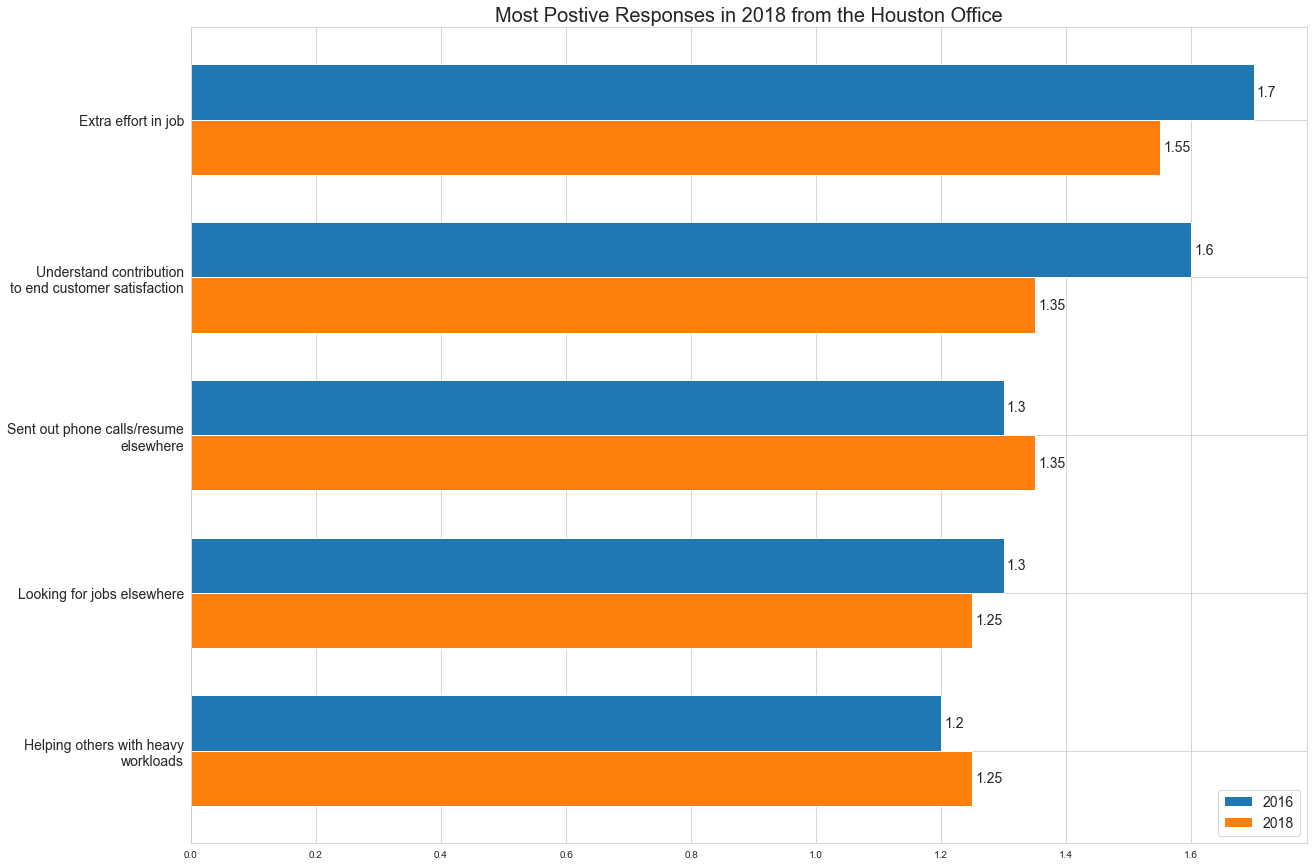

In [38]:
top_hous_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Houston')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Houston'][top_hous_2018.index], all_data[all_data['Office']=='Houston']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2018 from the Houston Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-32-b6470a09e196>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


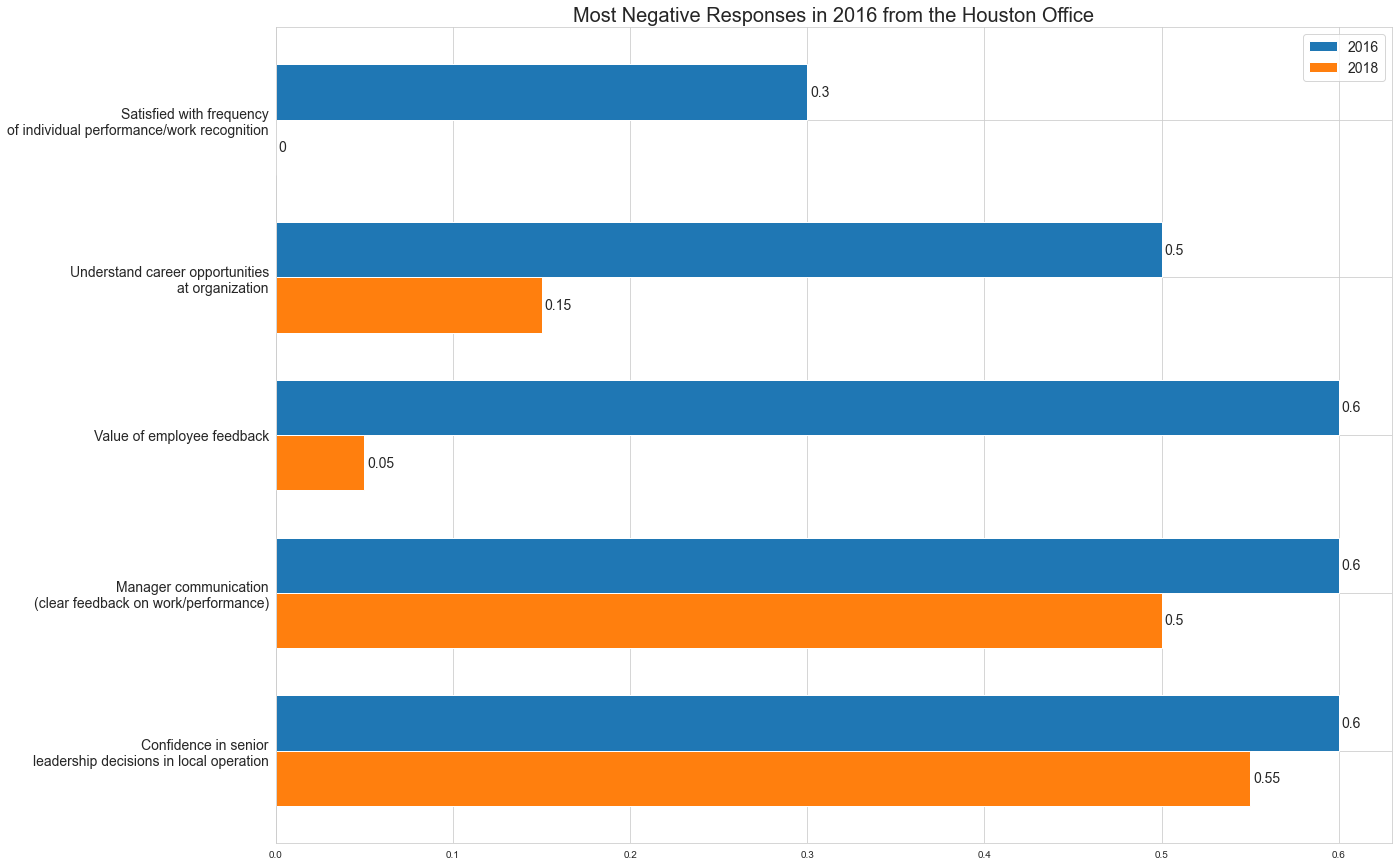

In [32]:
bottom_hous_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Houston')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Houston'][bottom_hous_2016.index], all_data[all_data['Office']=='Houston']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2016 from the Houston Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-33-83304b01900b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


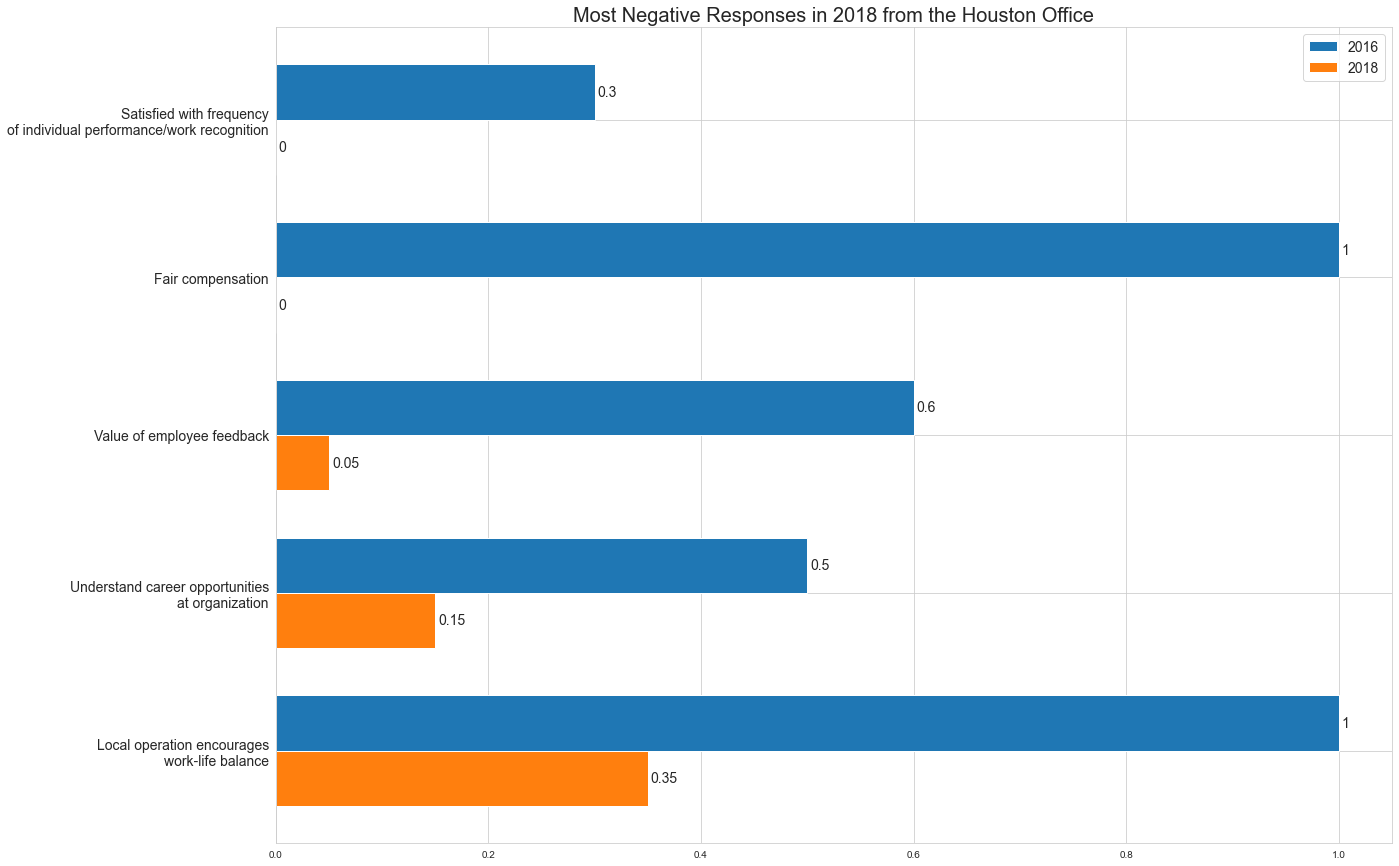

In [33]:
bottom_hous_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Houston')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Houston'][bottom_hous_2018.index], all_data[all_data['Office']=='Houston']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2018 from the Houston Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-41-c2f8bcf7ae34>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


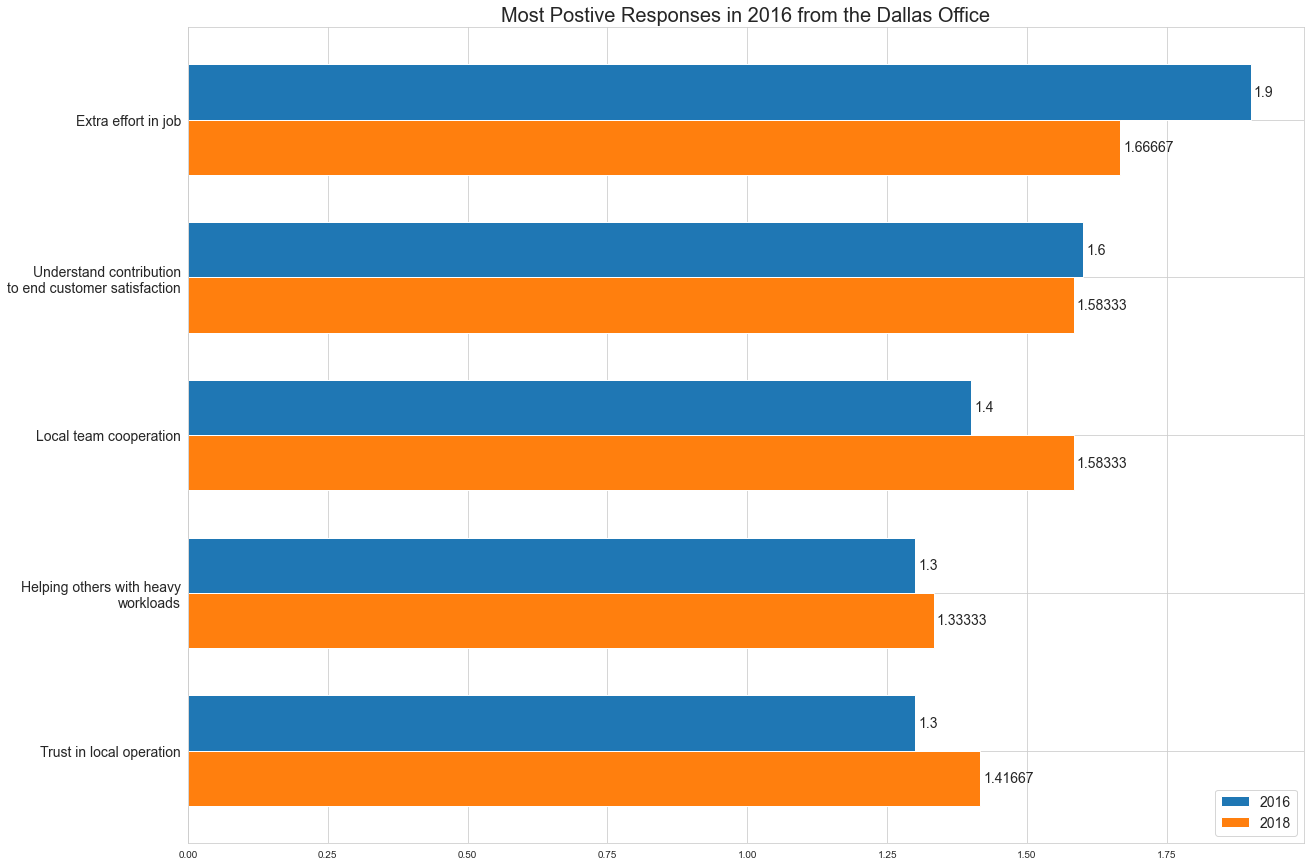

In [41]:
top_dal_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Dallas')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Dallas'][top_dal_2016.index], all_data[all_data['Office']=='Dallas']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2016 from the Dallas Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-42-f4f7abf948f4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


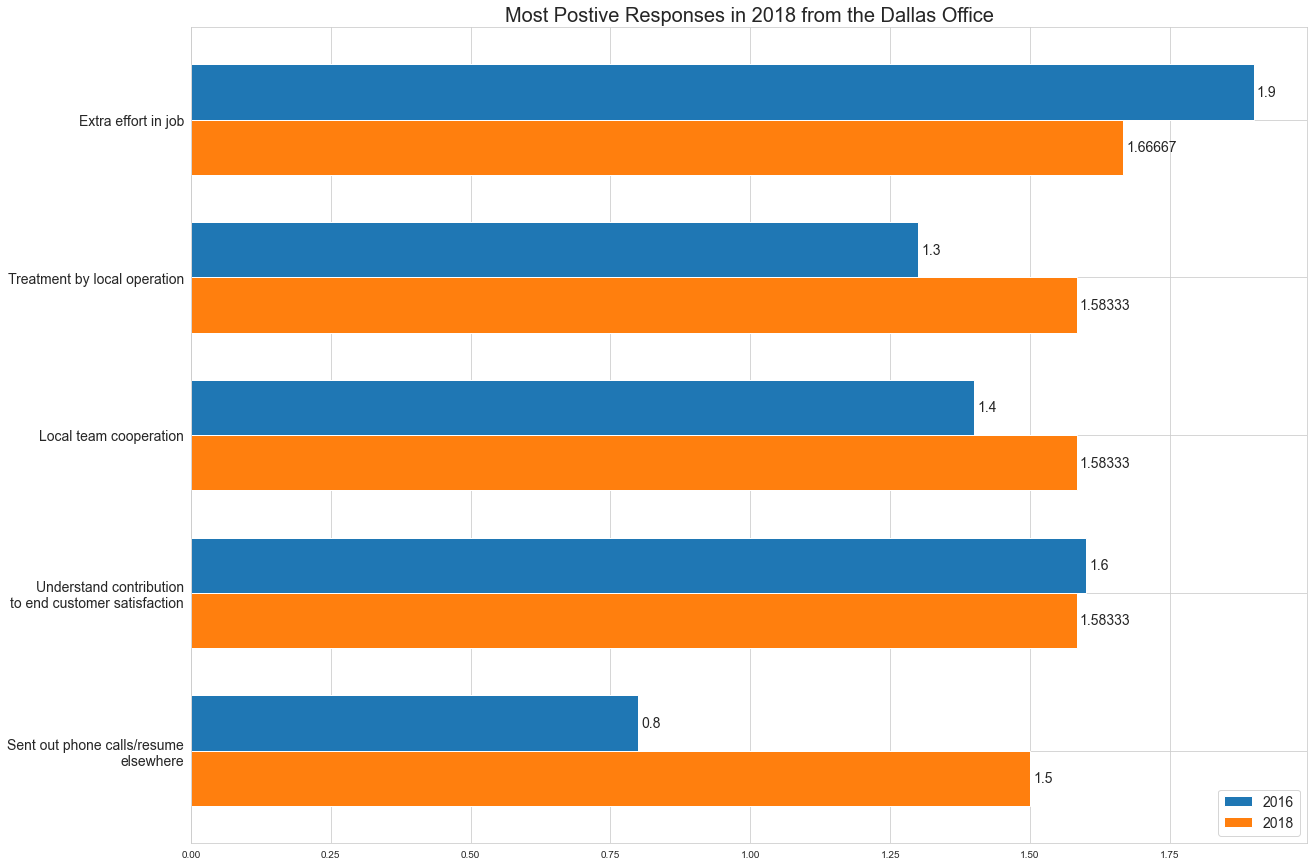

In [42]:
top_dal_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Dallas')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Dallas'][top_dal_2018.index], all_data[all_data['Office']=='Dallas']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2018 from the Dallas Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-43-9d1474954606>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


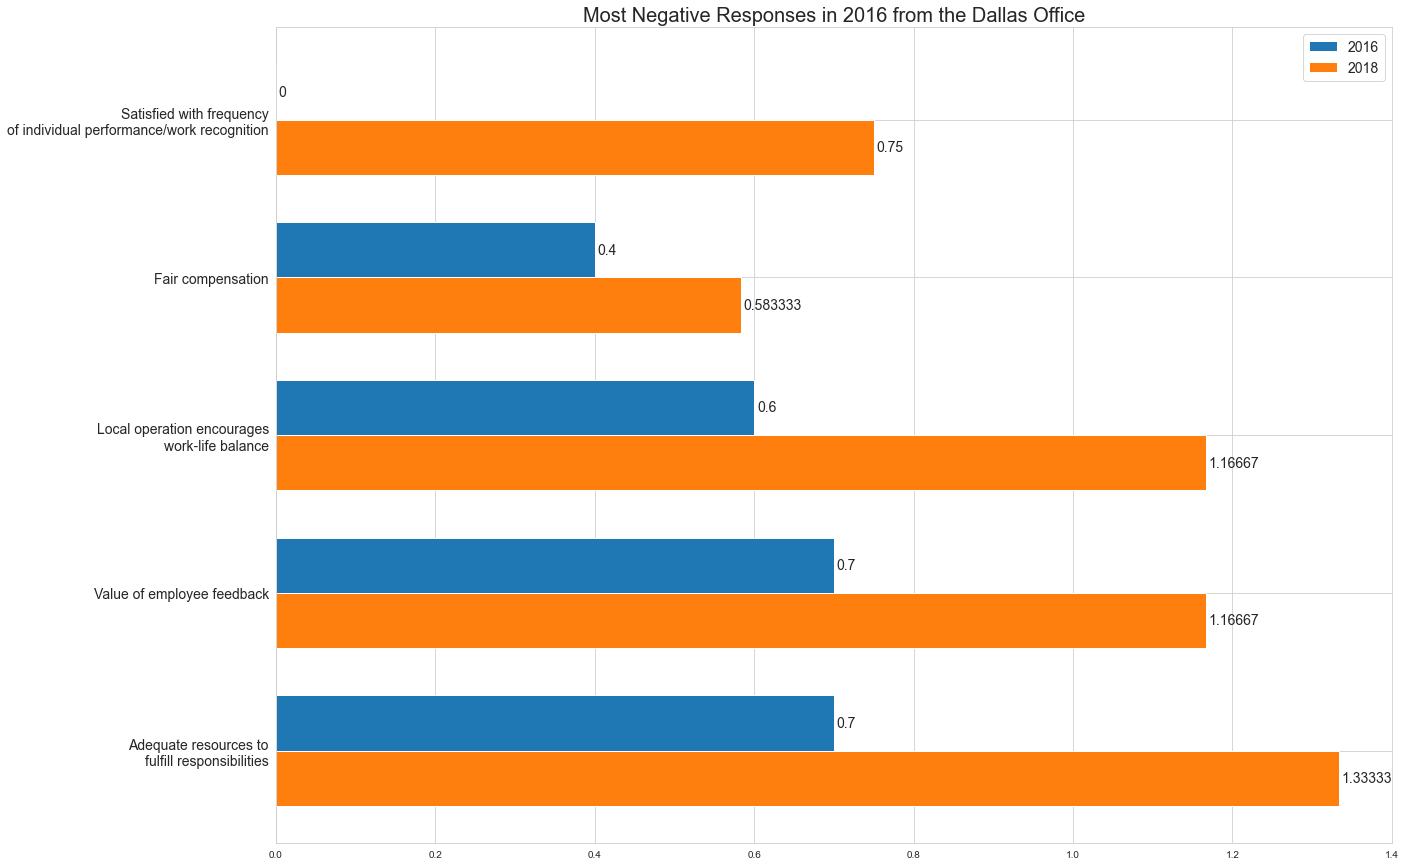

In [43]:
bottom_dal_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Dallas')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Dallas'][bottom_dal_2016.index], all_data[all_data['Office']=='Dallas']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2016 from the Dallas Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-44-e8b4fc55fe1c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


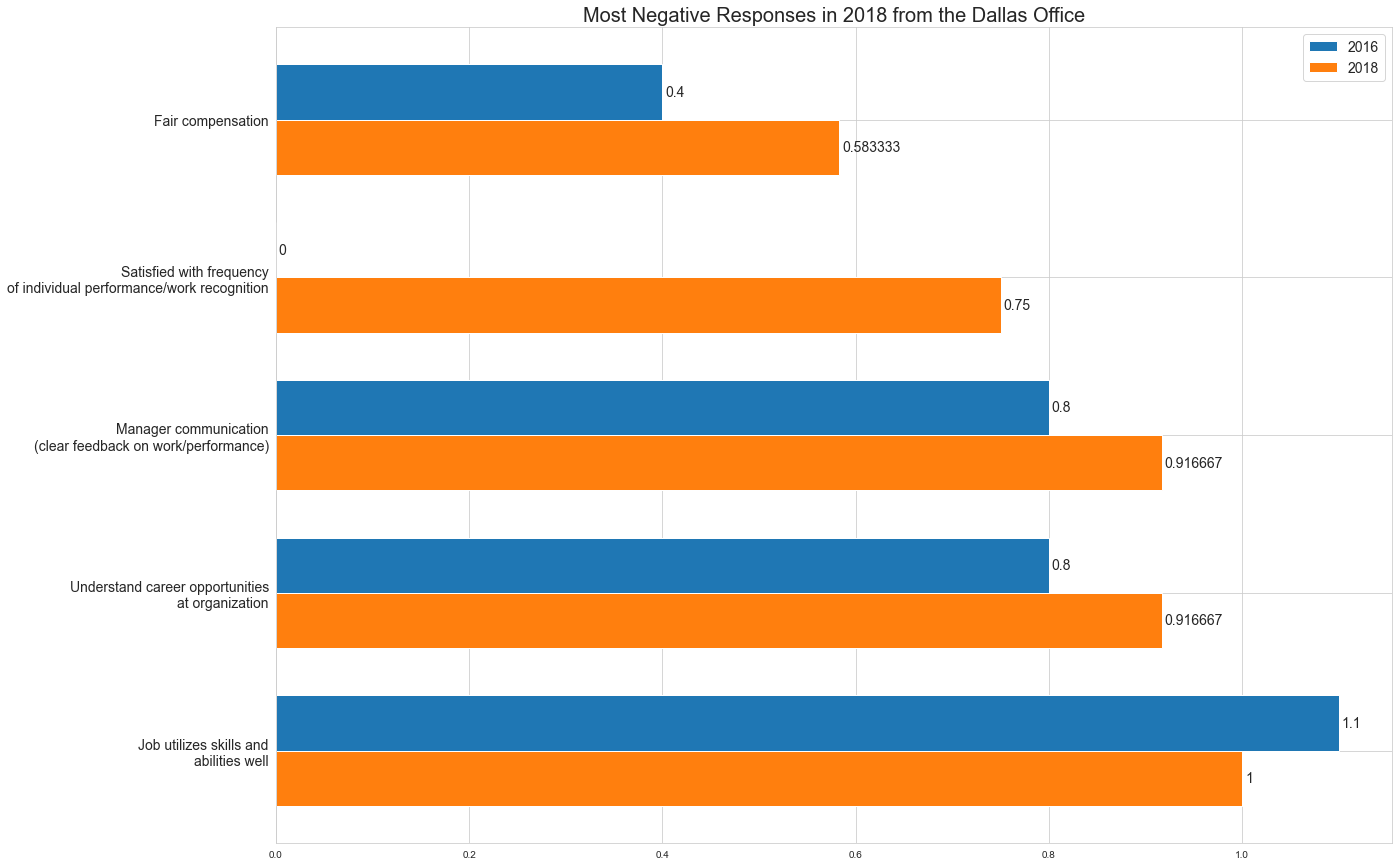

In [44]:
bottom_dal_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Dallas')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Dallas'][bottom_dal_2018.index], all_data[all_data['Office']=='Dallas']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2018 from the Dallas Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-45-1a6e802a3c5b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


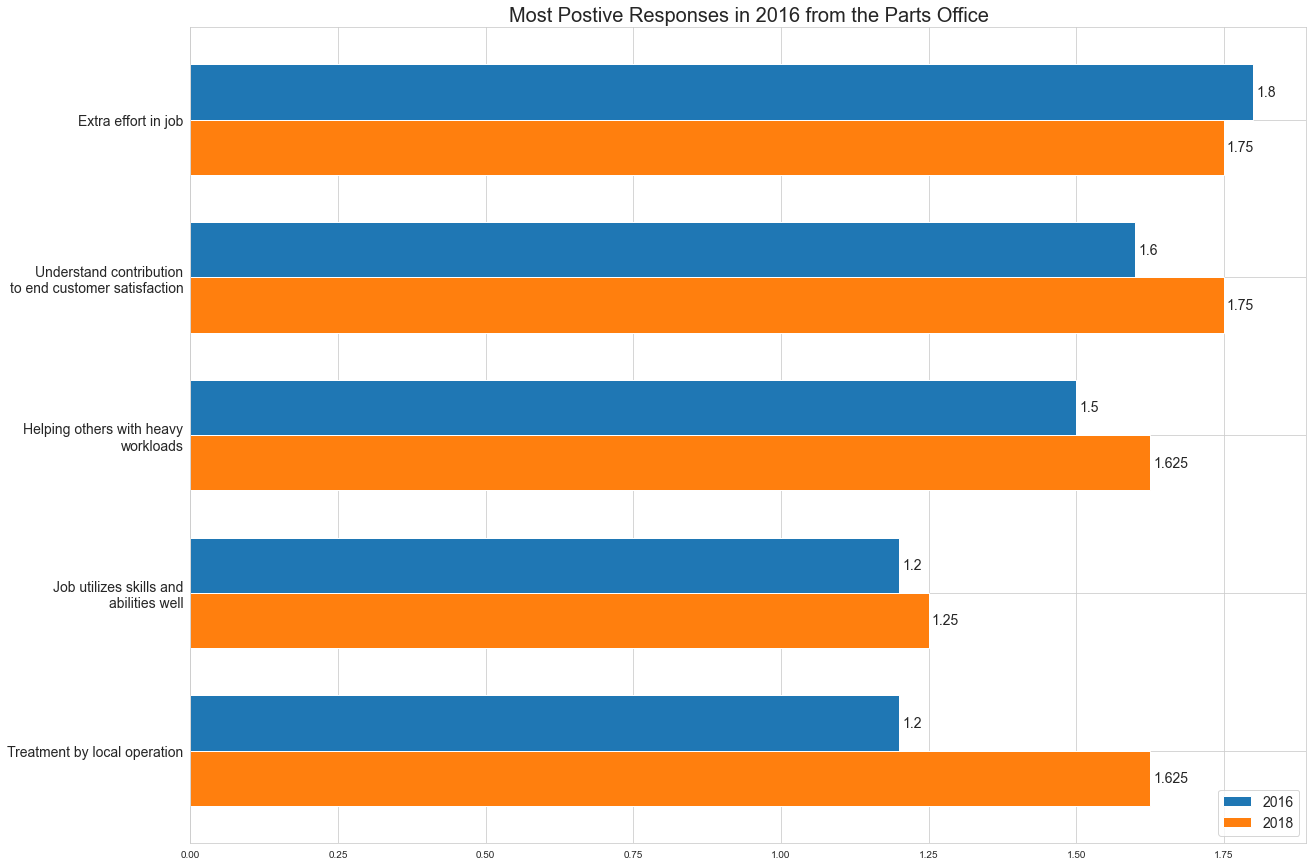

In [45]:
top_par_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Parts')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Parts'][top_par_2016.index], all_data[all_data['Office']=='Parts']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2016 from the Parts Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-46-fb5ded857aaf>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


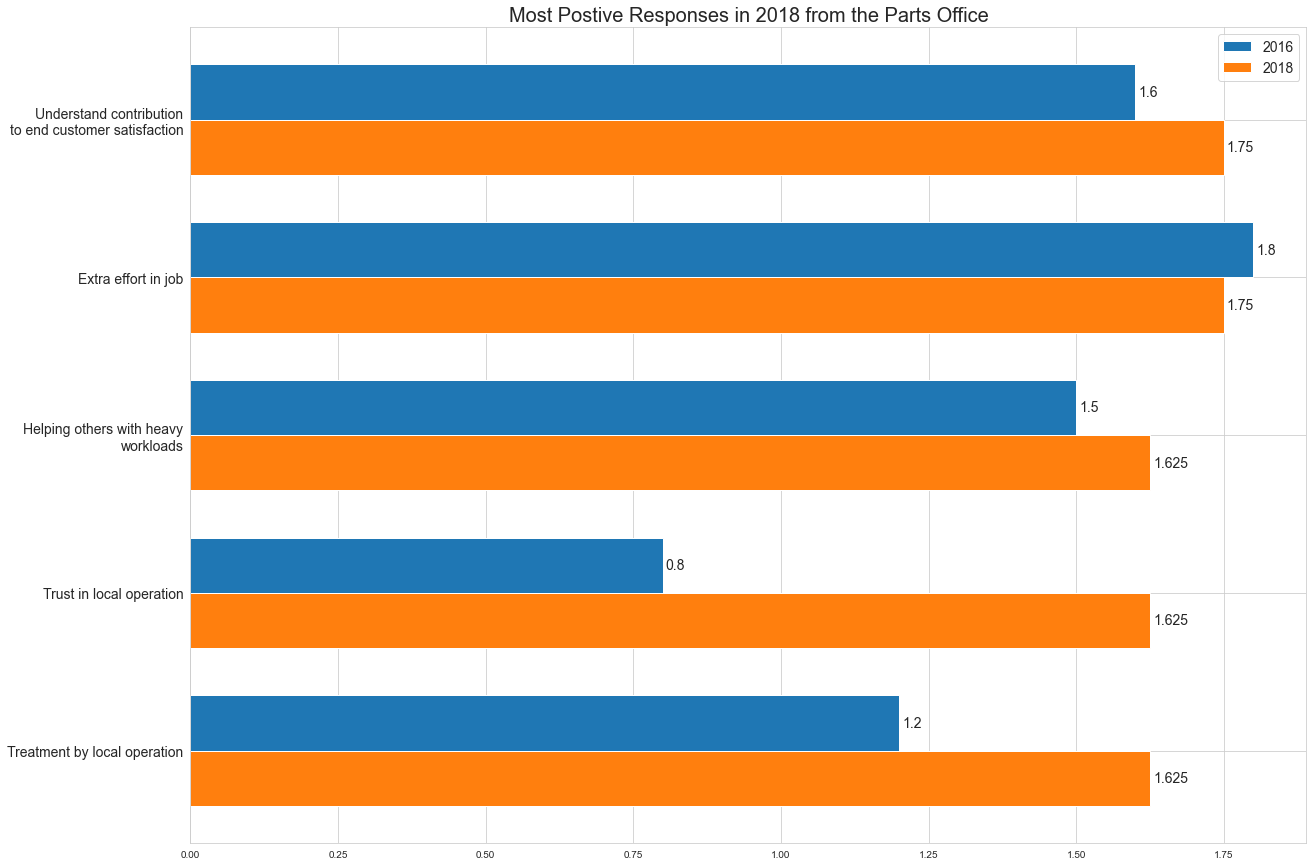

In [46]:
top_par_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Parts')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='Parts'][top_par_2018.index], all_data[all_data['Office']=='Parts']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2018 from the Parts Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-47-9a1ff01c578e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


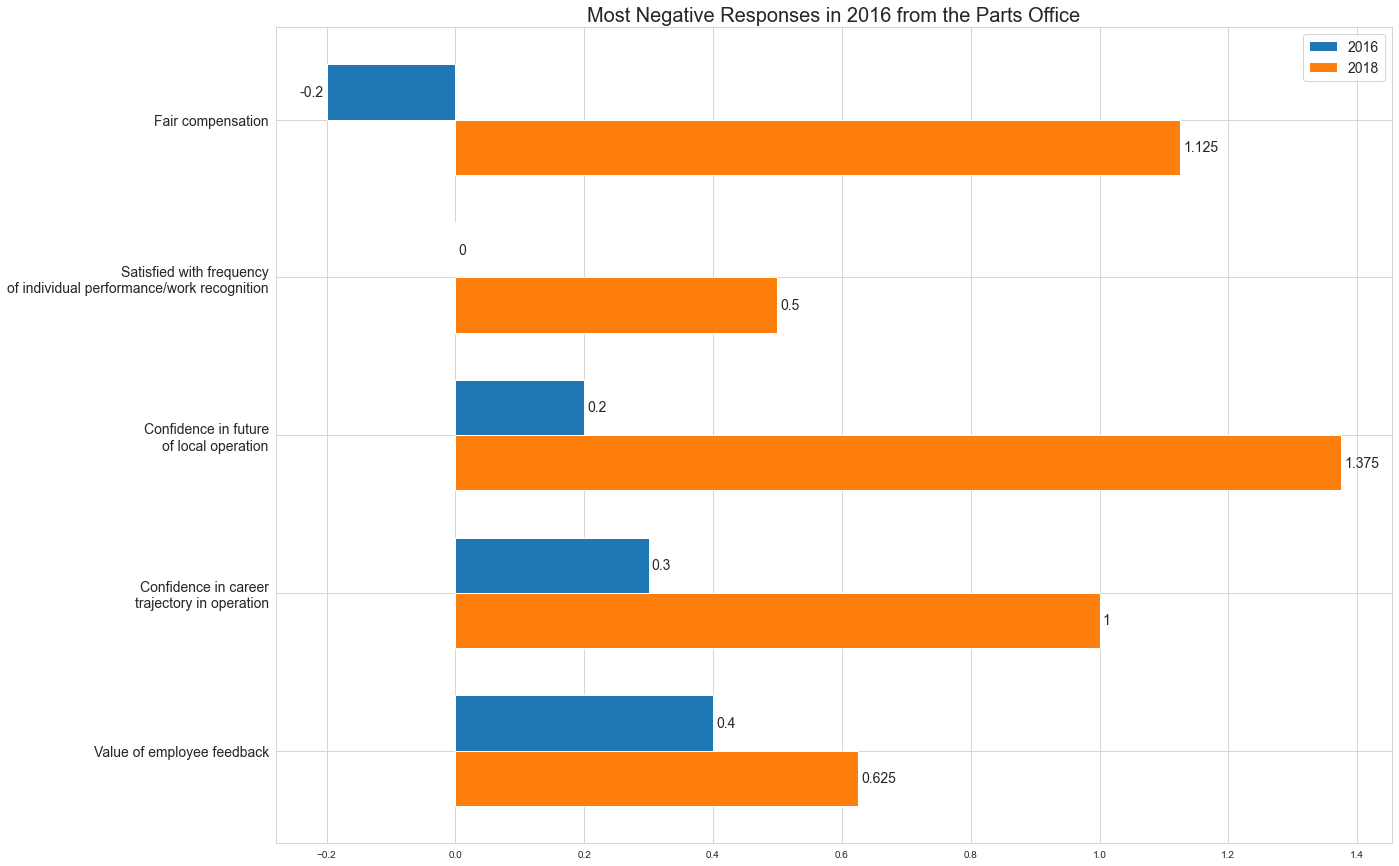

In [47]:
bottom_par_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='Parts')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Parts'][bottom_par_2016.index], all_data[all_data['Office']=='Parts']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2016 from the Parts Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-48-823807bdaff8>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


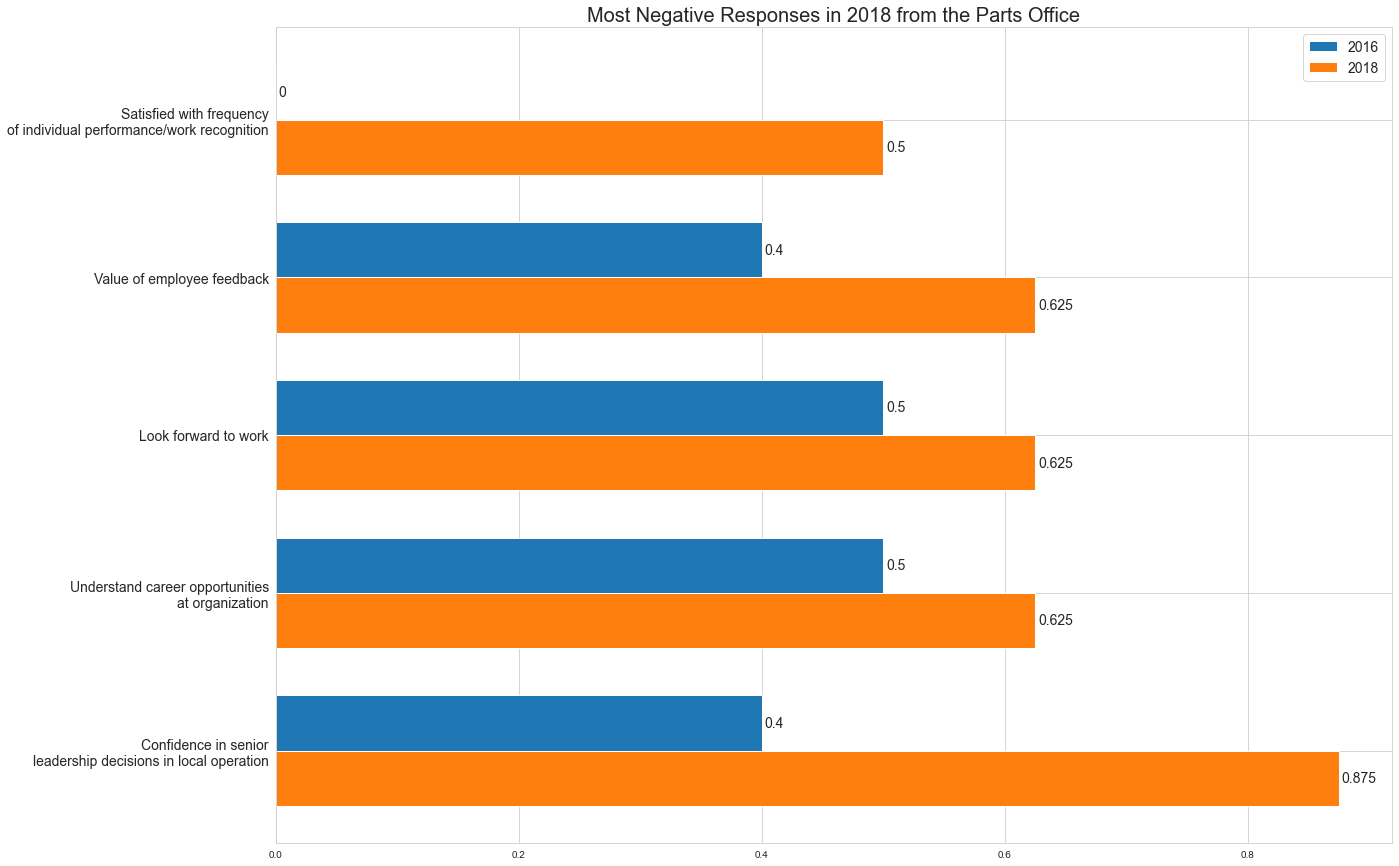

In [48]:
bottom_par_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='Parts')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='Parts'][bottom_par_2018.index], all_data[all_data['Office']=='Parts']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2018 from the Parts Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-49-ff72a8ebc326>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


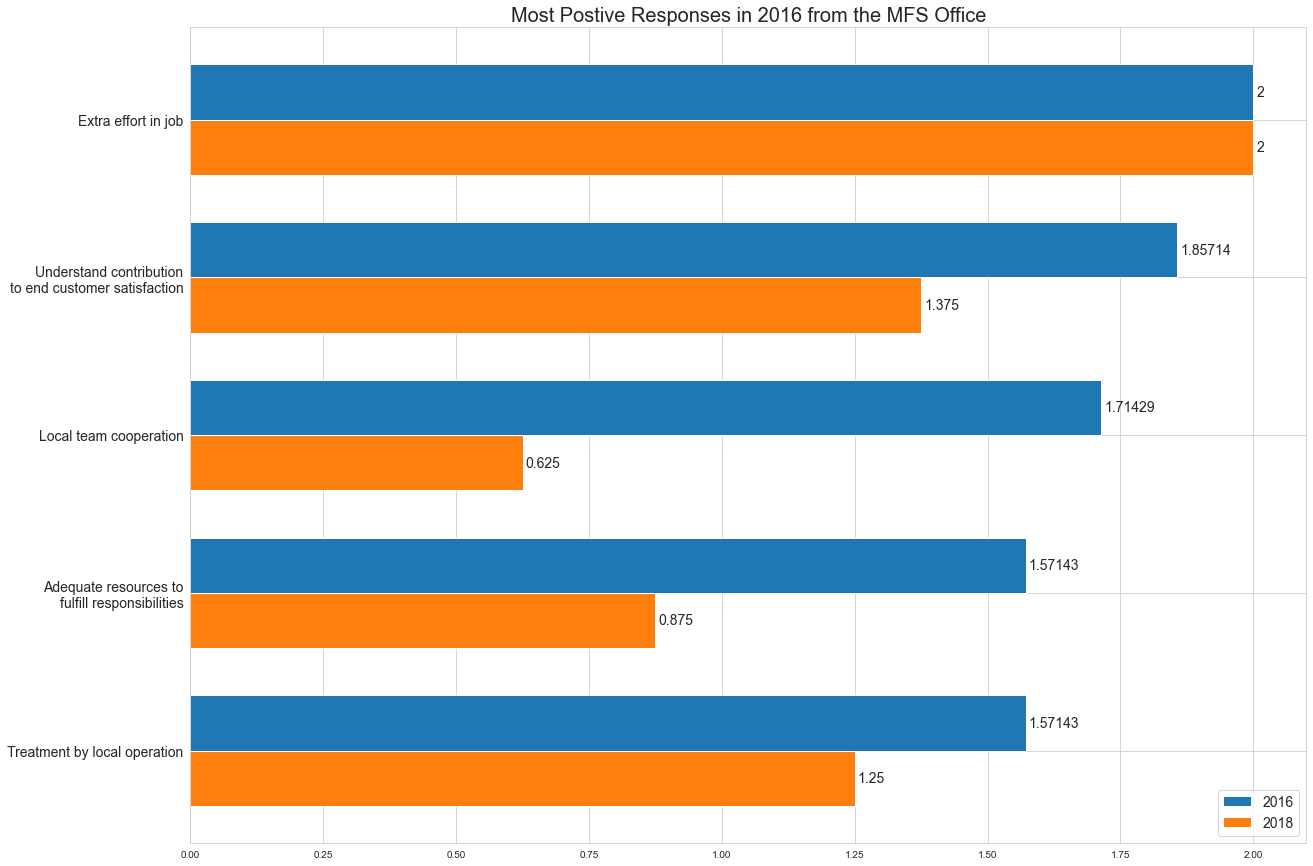

In [49]:
top_mfs_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='MFS')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='MFS'][top_mfs_2016.index], all_data[all_data['Office']=='MFS']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2016 from the MFS Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-50-da54496e14d6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


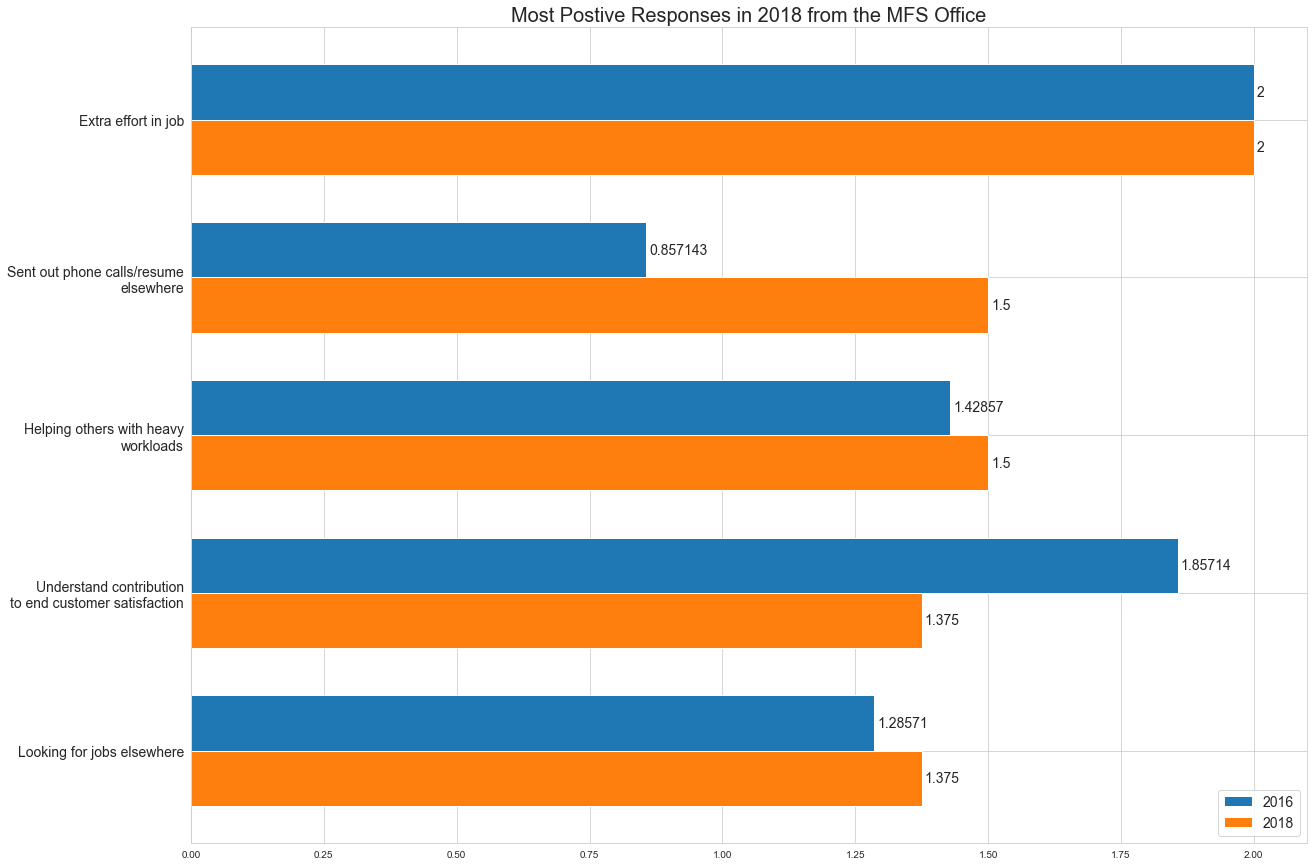

In [50]:
top_mfs_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='MFS')][all_data.columns[:-2]].mean().sort_values(ascending=False)[:5]
comparison = pd.concat([all_data[all_data['Office']=='MFS'][top_mfs_2018.index], all_data[all_data['Office']=='MFS']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Postive Responses in 2018 from the MFS Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-51-45d12f151fc2>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


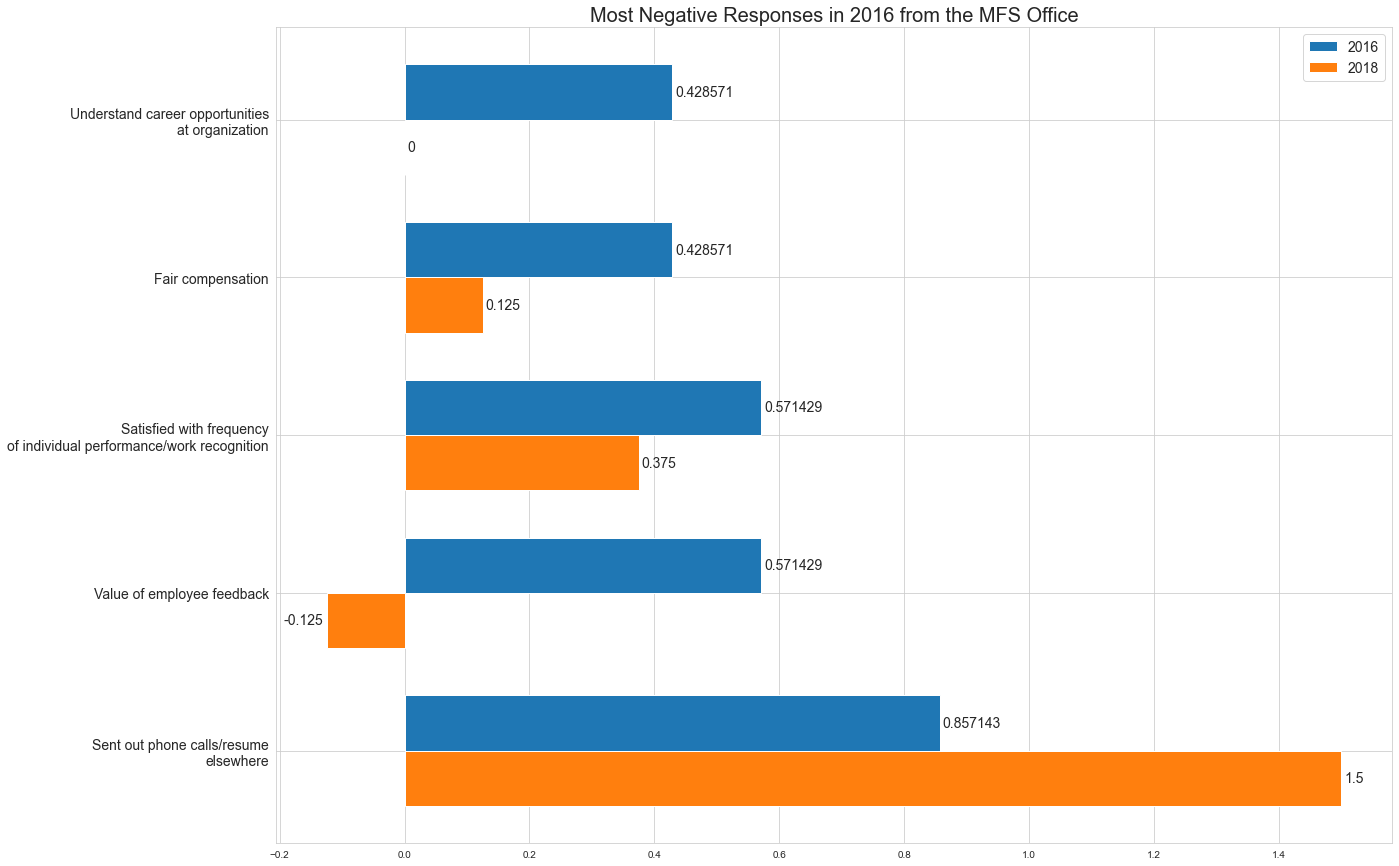

In [51]:
bottom_mfs_2016 = all_data.loc[(all_data['Year']==2016)&(all_data['Office']=='MFS')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='MFS'][bottom_mfs_2016.index], all_data[all_data['Office']=='MFS']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2016 from the MFS Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

<ipython-input-52-06f81820b8c9>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(comparison.columns, fontsize=14)


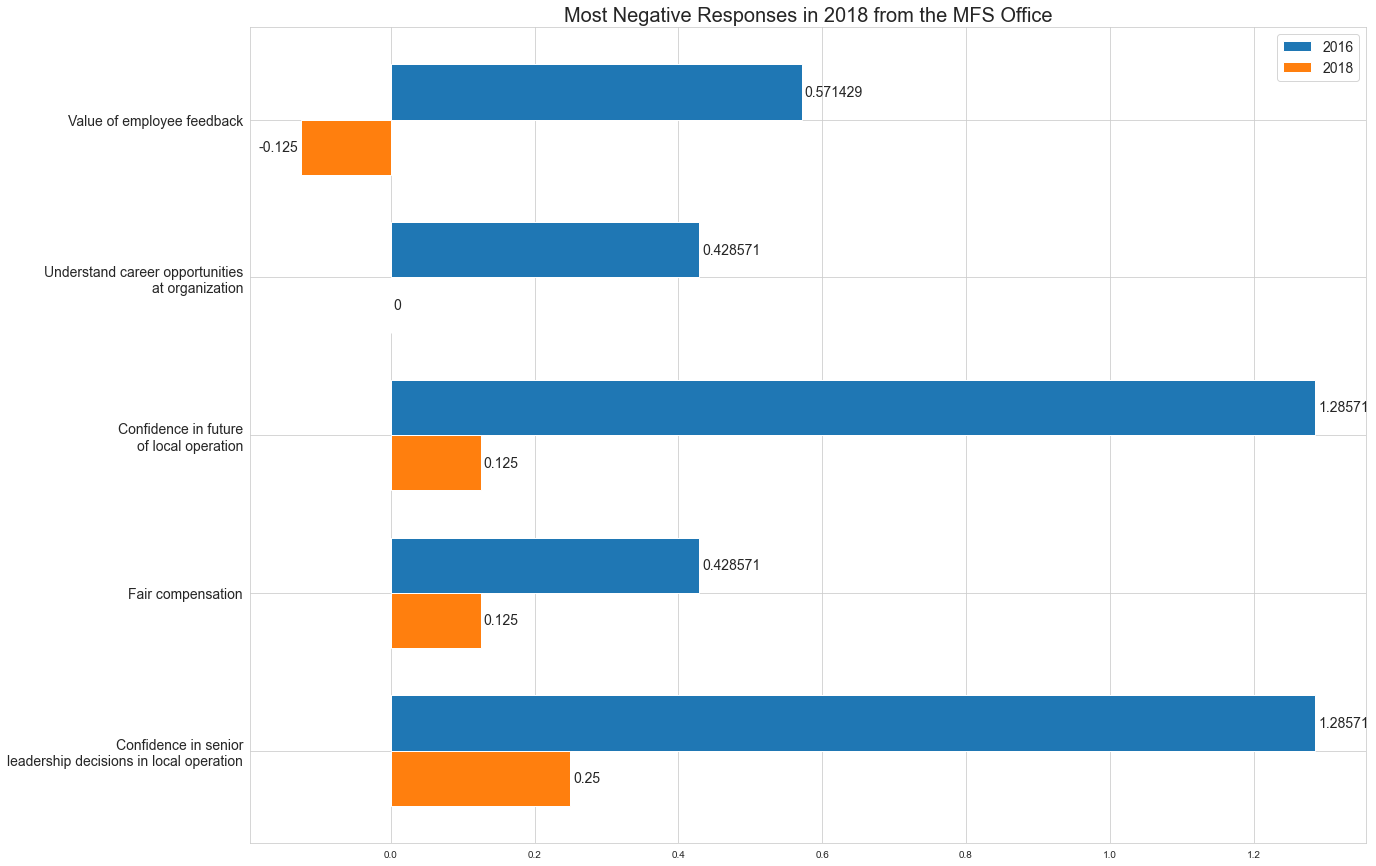

In [52]:
bottom_mfs_2018 = all_data.loc[(all_data['Year']==2018)&(all_data['Office']=='MFS')][all_data.columns[:-2]].mean().sort_values()[:5]
comparison = pd.concat([all_data[all_data['Office']=='MFS'][bottom_mfs_2018.index], all_data[all_data['Office']=='MFS']['Year']], axis=1).groupby('Year').mean().reset_index(level=0)
means_2016 = comparison[comparison['Year']==2016][comparison.columns[1:]].values.tolist()[0]
means_2018 = comparison[comparison['Year']==2018][comparison.columns[1:]].values.tolist()[0]
y = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.barh(y - width/2, means_2016, width, label='2016')
rects2 = ax.barh(y + width/2, means_2018, width, label='2018')

ax.bar_label(rects1, padding=3, fontsize=14)
ax.bar_label(rects2, padding=3, fontsize=14)
ax.set_yticklabels(comparison.columns, fontsize=14)
plt.title('Most Negative Responses in 2018 from the MFS Office', fontsize=20)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()

labels = [column for column in comparison.columns[1:]]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(5), ylabels);

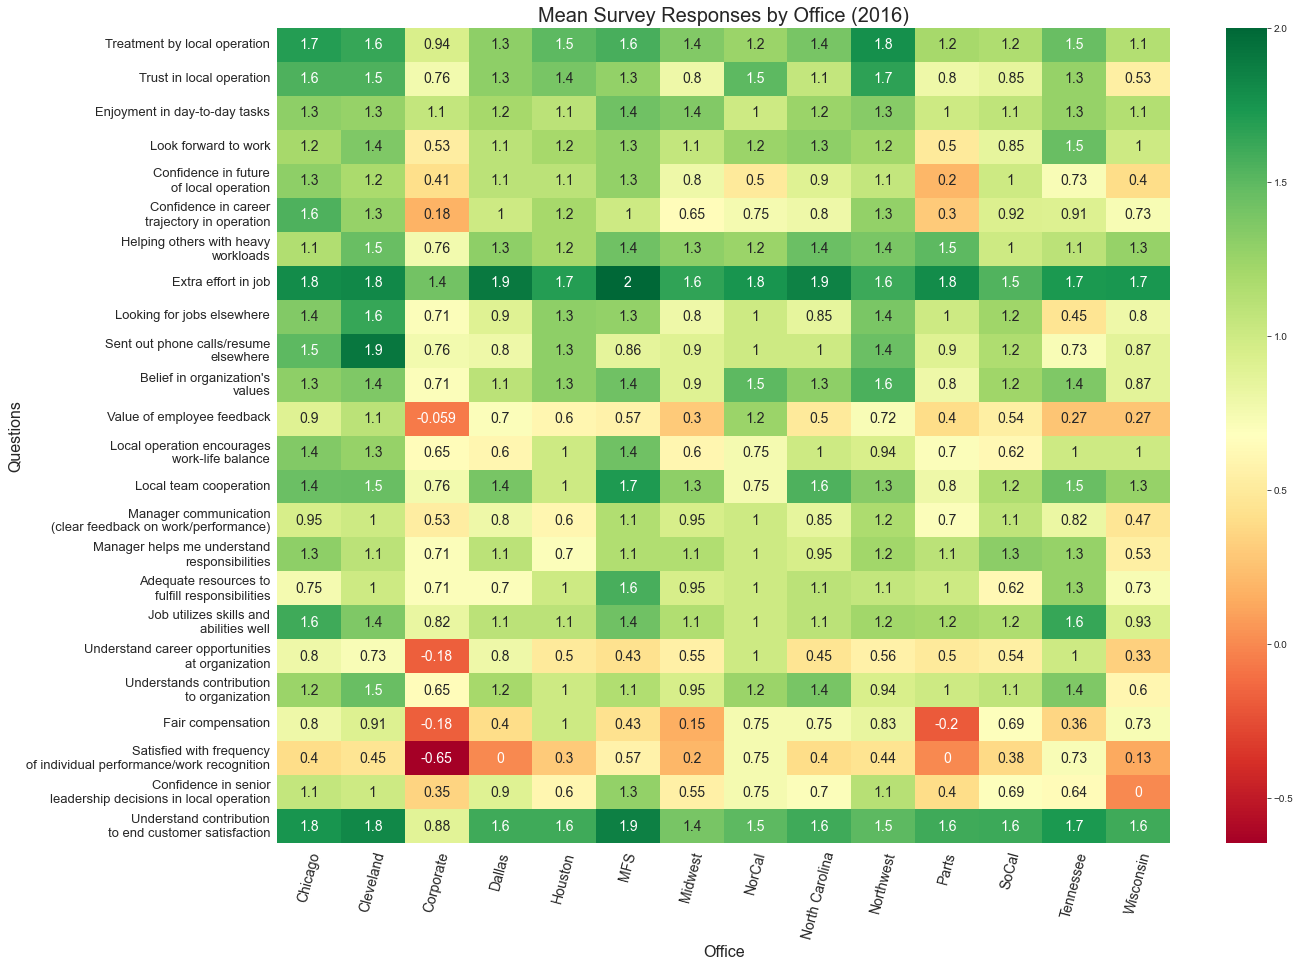

In [101]:
import matplotlib.transforms

fig,ax = plt.subplots(figsize=(20,15))
heatmap_df = all_data[all_data['Year']==2016][all_data.columns[:-1]].groupby('Office').mean().transpose()
sns.heatmap(heatmap_df, annot=True, annot_kws={"fontsize":14}, cmap='RdYlGn')
ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=14, labelrotation=75)
labels = [column for column in heatmap_df.index]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(len(ylabels)), ylabels)
ax.set_ylabel('Questions', fontsize=16)
ax.set_xlabel('Office', fontsize=16)
plt.title('Mean Survey Responses by Office (2016)', fontsize=20)

dx = 0/72.; dy = -15/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset);

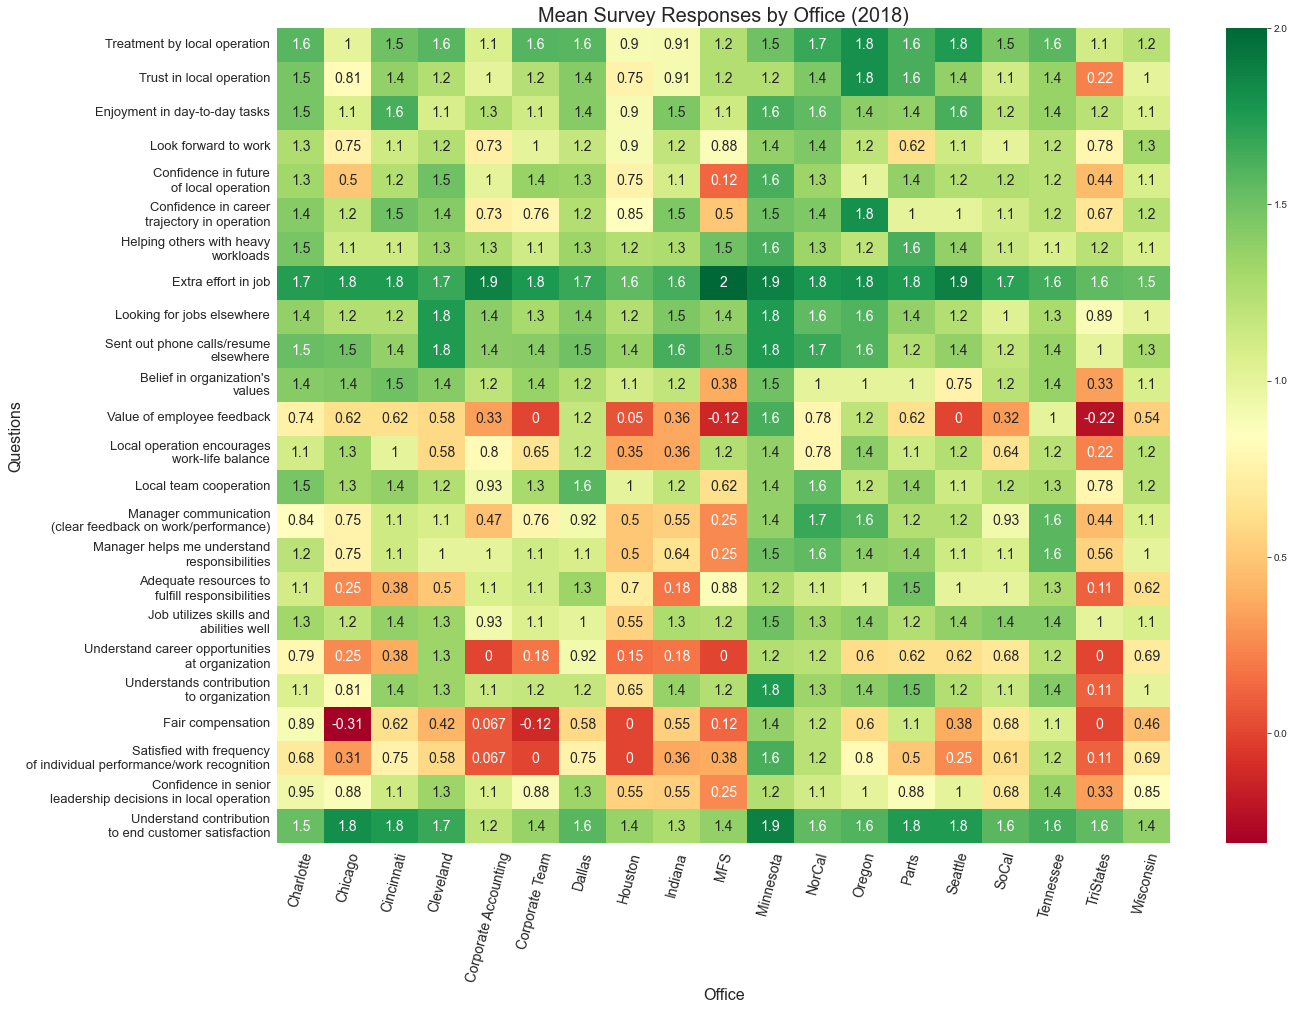

In [102]:
fig,ax = plt.subplots(figsize=(20,15))
heatmap_df = all_data[all_data['Year']==2018][all_data.columns[:-1]].groupby('Office').mean().transpose()
sns.heatmap(heatmap_df, annot=True, annot_kws={"fontsize":14}, cmap='RdYlGn')
ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=14, labelrotation=75)
labels = [column for column in heatmap_df.index]
ylabels = [column[:column.find(' ',20)] + '\n' + column[column.find(' ',20)+1:] if len(column)>30 else column for column in labels]
plt.yticks(range(len(ylabels)), ylabels)
ax.set_ylabel('Questions', fontsize=16)
ax.set_xlabel('Office', fontsize=16)
plt.title('Mean Survey Responses by Office (2018)', fontsize=20)

dx = 0/72.; dy = -15/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset);